In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# To read data and specify column names
df = pd.read_csv("../data/BTC_USDT.csv", names=['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'])

# To convert the 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='ms')


In [3]:
df.tail()

,Timestamp,Open,High,Low,Close,Volume
2709,2025-02-12,95778.21,98119.99,94088.23,97869.99,29151.16625
2710,2025-02-13,97870.00,98083.91,95217.36,96608.14,19921.77616
2711,2025-02-14,96608.13,98826.00,96252.82,97500.48,18173.02646
2712,2025-02-15,97500.47,97972.26,97223.58,97569.66,7349.37683
2713,2025-02-16,97569.67,97704.47,96046.18,96118.12,8191.42490


## Exploratory Data Analysis 

In [4]:
# Check the basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2714 entries, 0 to 2713
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  2714 non-null   datetime64[ns]
 1   Open       2714 non-null   float64       
 2   High       2714 non-null   float64       
 3   Low        2714 non-null   float64       
 4   Close      2714 non-null   float64       
 5   Volume     2714 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 127.3 KB


In [5]:
# Display statistical details
df.describe()

,Timestamp,Open,High,Low,Close,Volume
count,2714,2714.000000,2714.000000,2714.000000,2714.000000,2714.000000
mean,2021-05-17 17:04:33.249815808,28220.446168,28898.737612,27498.370906,28252.923626,67389.283119
min,2017-08-17 00:00:00,3188.010000,3276.500000,2817.000000,3189.020000,228.108068
25%,2019-07-02 06:00:00,8625.587500,8824.747500,8299.750000,8616.250000,27739.102123
50%,2021-05-17 12:00:00,20589.755000,21206.050000,20146.290000,20591.485000,43276.395819
75%,2023-04-02 18:00:00,42830.297500,43627.420000,41869.500000,42847.300000,70450.121328
max,2025-02-16 00:00:00,106143.820000,109588.000000,105321.490000,106143.820000,760705.362783
std,NaN,23754.252024,24265.459504,23232.062421,23782.457999,79777.470928


In [6]:
#checking missing values 
df.isnull().sum()

Timestamp    0
Open         0
High         0
Low          0
Close        0
Volume       0
dtype: int64

In [7]:
# Check the data types of each column
df.dtypes

Timestamp    datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume              float64
dtype: object

In [8]:
# Check for duplicate rows
df.duplicated().sum()

0

In [9]:
range_open = df['Open'].max() - df['Open'].min()
range_high = df['High'].max() - df['High'].min()
range_low = df['Low'].max() - df['Low'].min()
range_close = df['Close'].max() - df['Close'].min()
range_volume = df['Volume'].max() - df['Volume'].min()

In [10]:
ranges = {
    'Open': range_open,
    'High': range_high,
    'Low': range_low,
    'Close': range_close
}

In [11]:
ranges

{'Open': 102955.81000000001,
 'High': 106311.5,
 'Low': 102504.49,
 'Close': 102954.8}

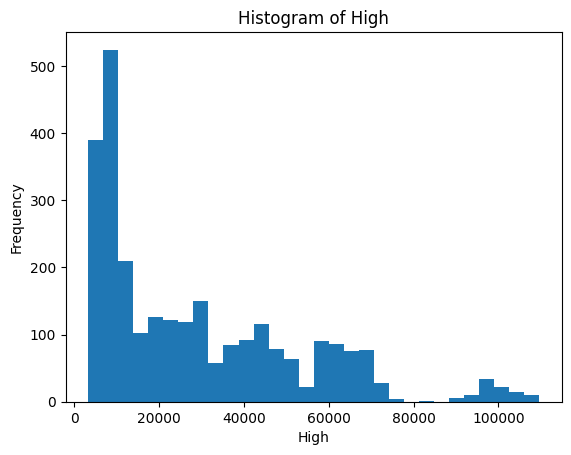

In [12]:
# Find column with maximum range
max_range_column = max(ranges, key=ranges.get)

# Plot histogram for the column with the maximum range
df[max_range_column].plot(kind='hist', bins=30, title=f'Histogram of {max_range_column}')
plt.xlabel(max_range_column)
plt.ylabel('Frequency')
plt.show()

In [13]:
df

,Timestamp,Open,High,Low,Close,Volume
0,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377
1,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264
2,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763
3,2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022
4,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060
...,...,...,...,...,...,...
2709,2025-02-12,95778.21,98119.99,94088.23,97869.99,29151.166250
2710,2025-02-13,97870.00,98083.91,95217.36,96608.14,19921.776160
2711,2025-02-14,96608.13,98826.00,96252.82,97500.48,18173.026460
2712,2025-02-15,97500.47,97972.26,97223.58,97569.66,7349.376830


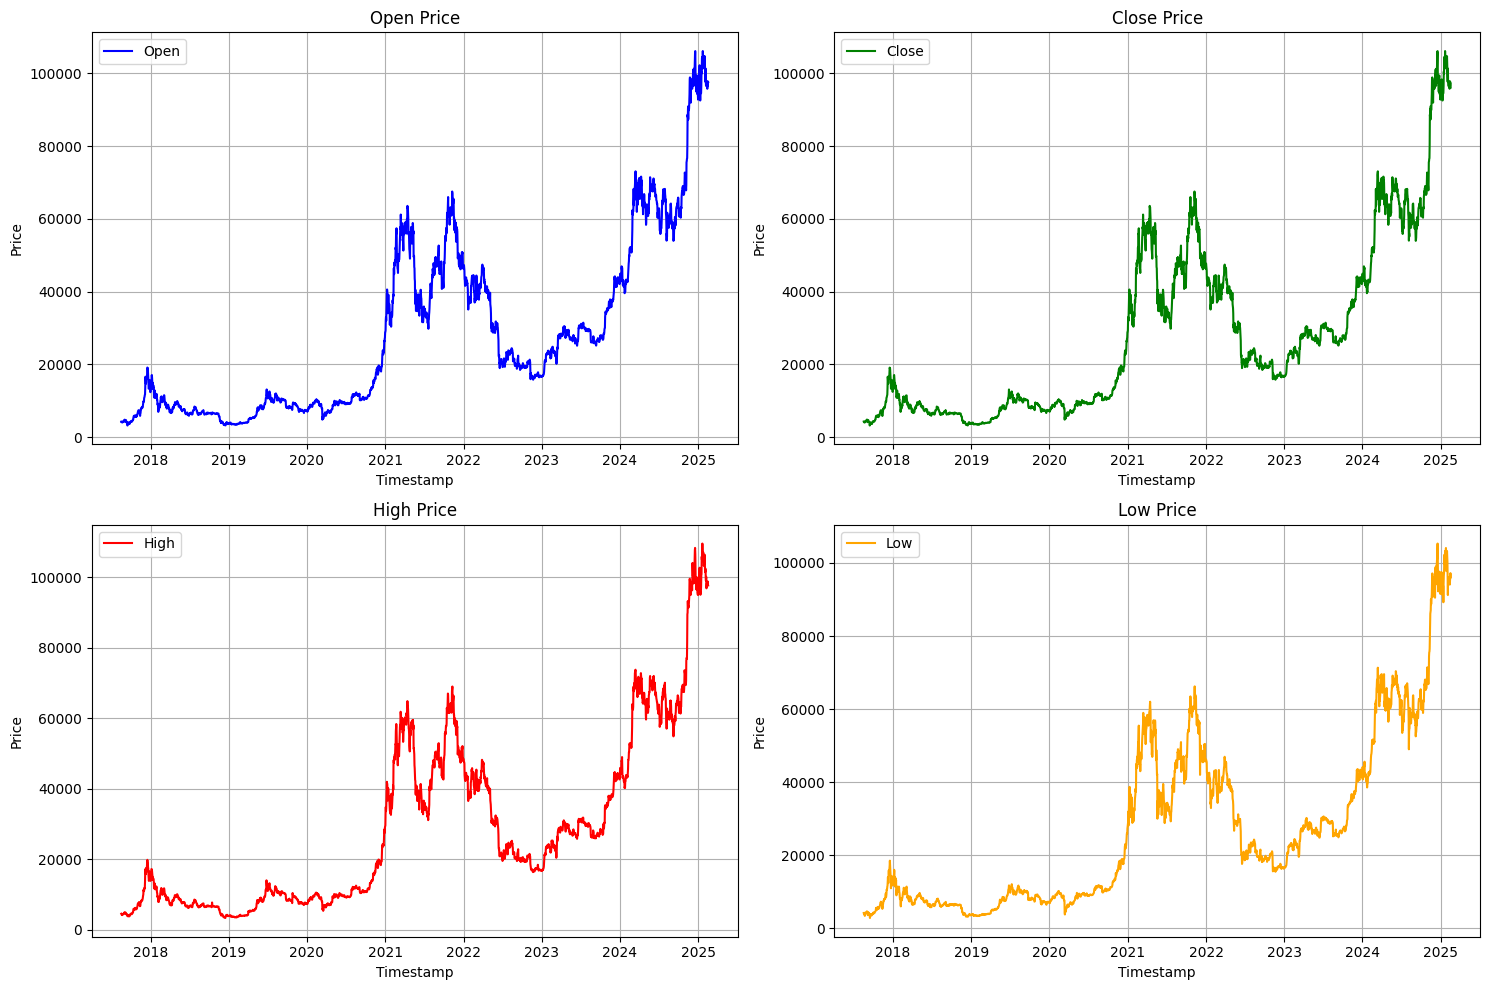

In [14]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot Open on the first subplot
axs[0, 0].plot(df['Timestamp'], df['Open'], color='blue', label='Open')
axs[0, 0].set_title('Open Price')
axs[0, 0].set_xlabel('Timestamp')
axs[0, 0].set_ylabel('Price')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Plot Close on the second subplot
axs[0, 1].plot(df['Timestamp'], df['Close'], color='green', label='Close')
axs[0, 1].set_title('Close Price')
axs[0, 1].set_xlabel('Timestamp')
axs[0, 1].set_ylabel('Price')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Plot High on the third subplot
axs[1, 0].plot(df['Timestamp'], df['High'], color='red', label='High')
axs[1, 0].set_title('High Price')
axs[1, 0].set_xlabel('Timestamp')
axs[1, 0].set_ylabel('Price')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Plot Low on the fourth subplot
axs[1, 1].plot(df['Timestamp'], df['Low'], color='orange', label='Low')
axs[1, 1].set_title('Low Price')
axs[1, 1].set_xlabel('Timestamp')
axs[1, 1].set_ylabel('Price')
axs[1, 1].legend()
axs[1, 1].grid(True)

# Automatically adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

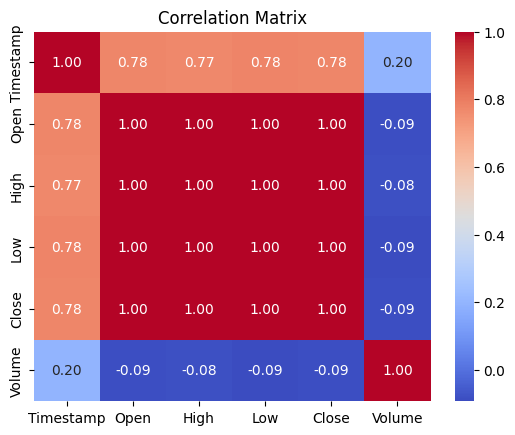

In [15]:
corr_matrix = df.corr()

import seaborn as sns
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

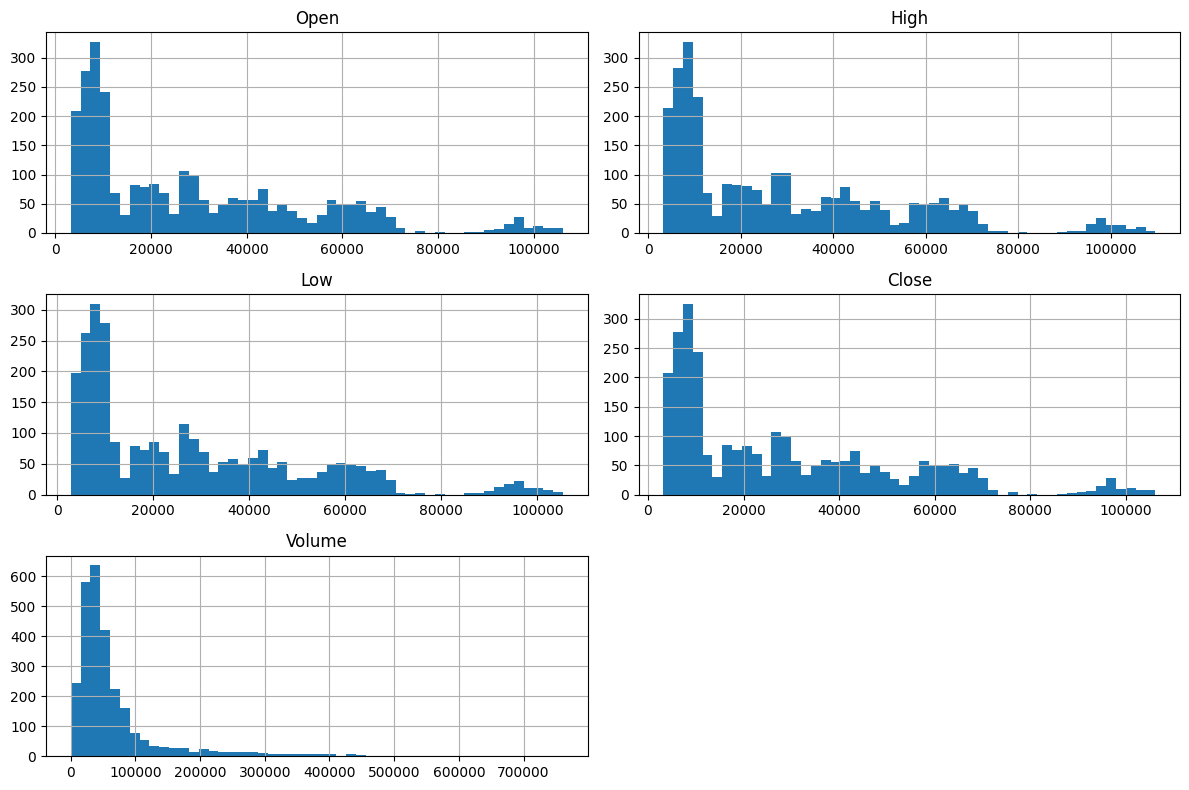

In [16]:
# Plot the distribution of numerical features
df[['Open', 'High', 'Low', 'Close', 'Volume']].hist(figsize=(12, 8), bins=50)
plt.tight_layout()
plt.show()


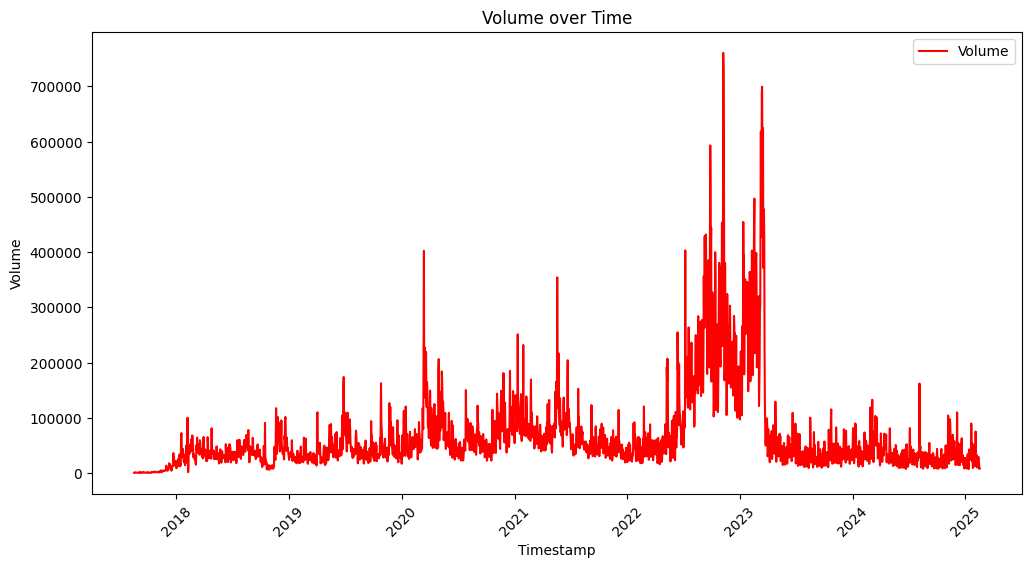

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['Volume'], label='Volume', color='red')
plt.title('Volume over Time')
plt.xlabel('Timestamp')
plt.ylabel('Volume')
plt.legend()
plt.xticks(rotation=45)
plt.show()

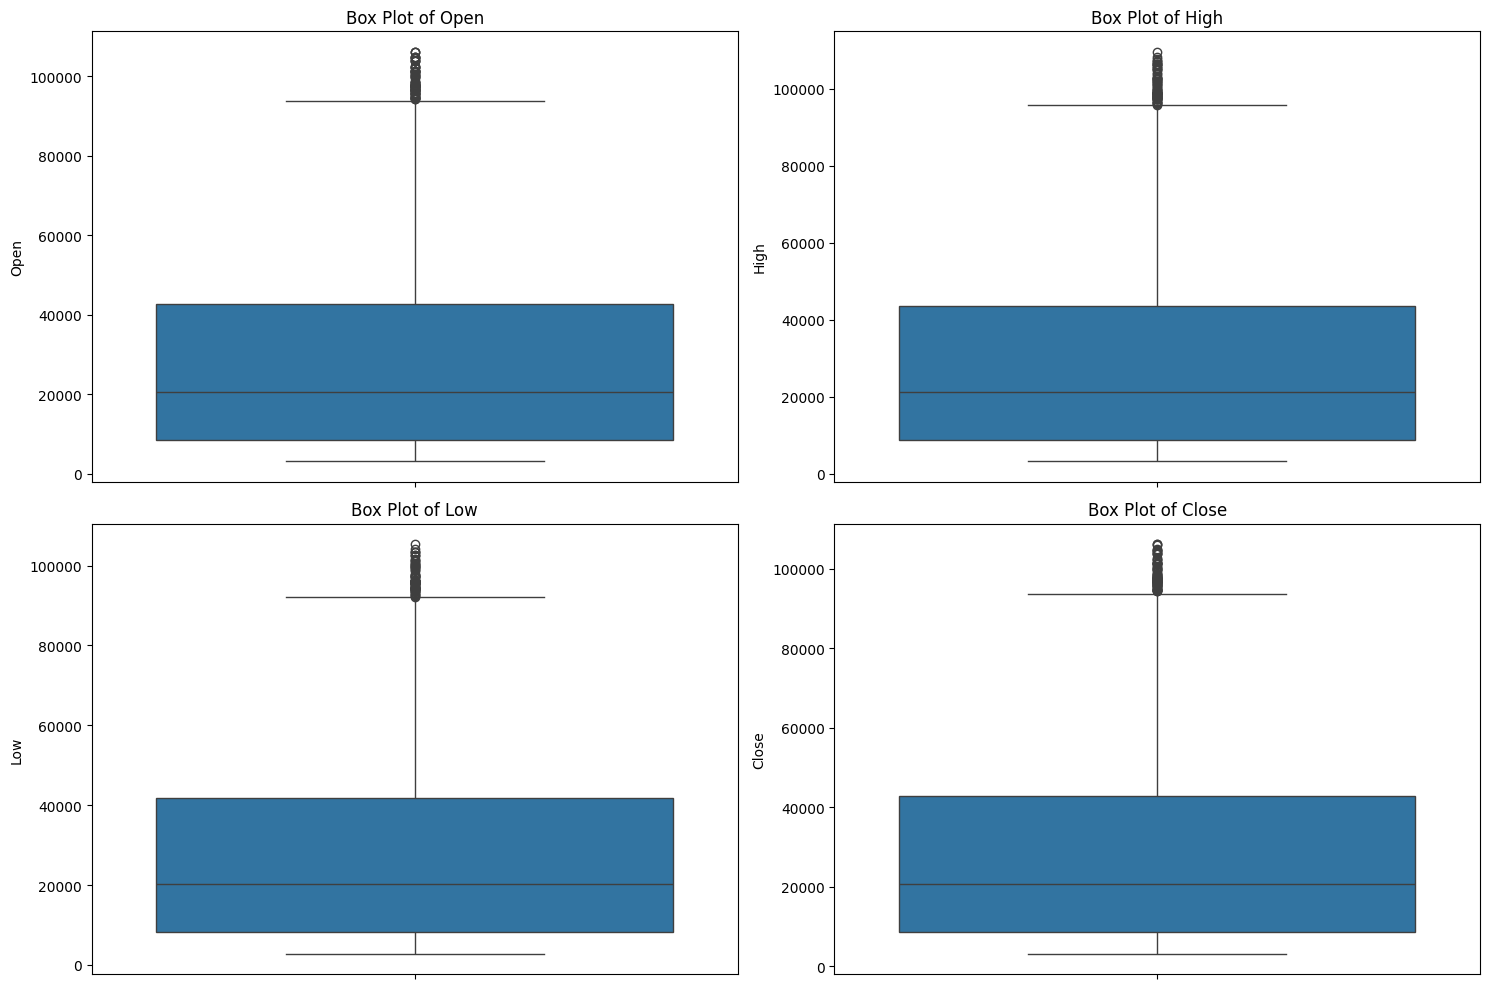

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Manually create boxplots for each column
sns.boxplot(data=df['Open'], ax=axs[0, 0])
axs[0, 0].set_title('Box Plot of Open')

sns.boxplot(data=df['High'], ax=axs[0, 1])
axs[0, 1].set_title('Box Plot of High')

sns.boxplot(data=df['Low'], ax=axs[1, 0])
axs[1, 0].set_title('Box Plot of Low')

sns.boxplot(data=df['Close'], ax=axs[1, 1])
axs[1, 1].set_title('Box Plot of Close')

# Adjust layout to prevent overlap of titles and labels
plt.tight_layout()
plt.show()

In [19]:
from scipy.stats import zscore

zs = zscore(df['Close'])
zs = zs.abs() > 3
zs

0       False
1       False
2       False
3       False
4       False
        ...  
2709    False
2710    False
2711    False
2712    False
2713    False
Name: Close, Length: 2714, dtype: bool

In [20]:
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['Year'] = df['Timestamp'].dt.year

In [21]:
df = df.drop('Timestamp', axis=1)

In [22]:
df.head(10)

,Open,High,Low,Close,Volume,Day,Month,Year
0,4261.48,4485.39,4200.74,4285.08,795.150377,17,8,2017
1,4285.08,4371.52,3938.77,4108.37,1199.888264,18,8,2017
2,4108.37,4184.69,3850.00,4139.98,381.309763,19,8,2017
3,4120.98,4211.08,4032.62,4086.29,467.083022,20,8,2017
4,4069.13,4119.62,3911.79,4016.00,691.743060,21,8,2017
5,4016.00,4104.82,3400.00,4040.00,966.684858,22,8,2017
6,4040.00,4265.80,4013.89,4114.01,1001.136565,23,8,2017
7,4147.00,4371.68,4085.01,4316.01,787.418753,24,8,2017
8,4316.01,4453.91,4247.48,4280.68,573.612740,25,8,2017
9,4280.71,4367.00,4212.41,4337.44,228.108068,26,8,2017




==================== EDA for data\ADA_USDT.csv ====================

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2474 entries, 0 to 2473
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  2474 non-null   datetime64[ns]
 1   Open       2474 non-null   float64       
 2   High       2474 non-null   float64       
 3   Low        2474 non-null   float64       
 4   Close      2474 non-null   float64       
 5   Volume     2474 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 116.1 KB
None

Statistical Summary:
                           Timestamp         Open         High          Low  \
count                           2474  2474.000000  2474.000000  2474.000000   
mean   2021-09-16 11:53:00.921584640     0.492727     0.512800     0.471026   
min              2018-04-17 00:00:00     0.023320     0.026500     0.017650   
25%              2020-01

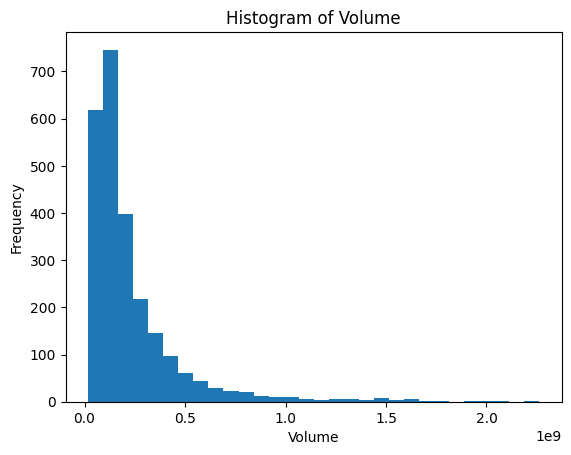

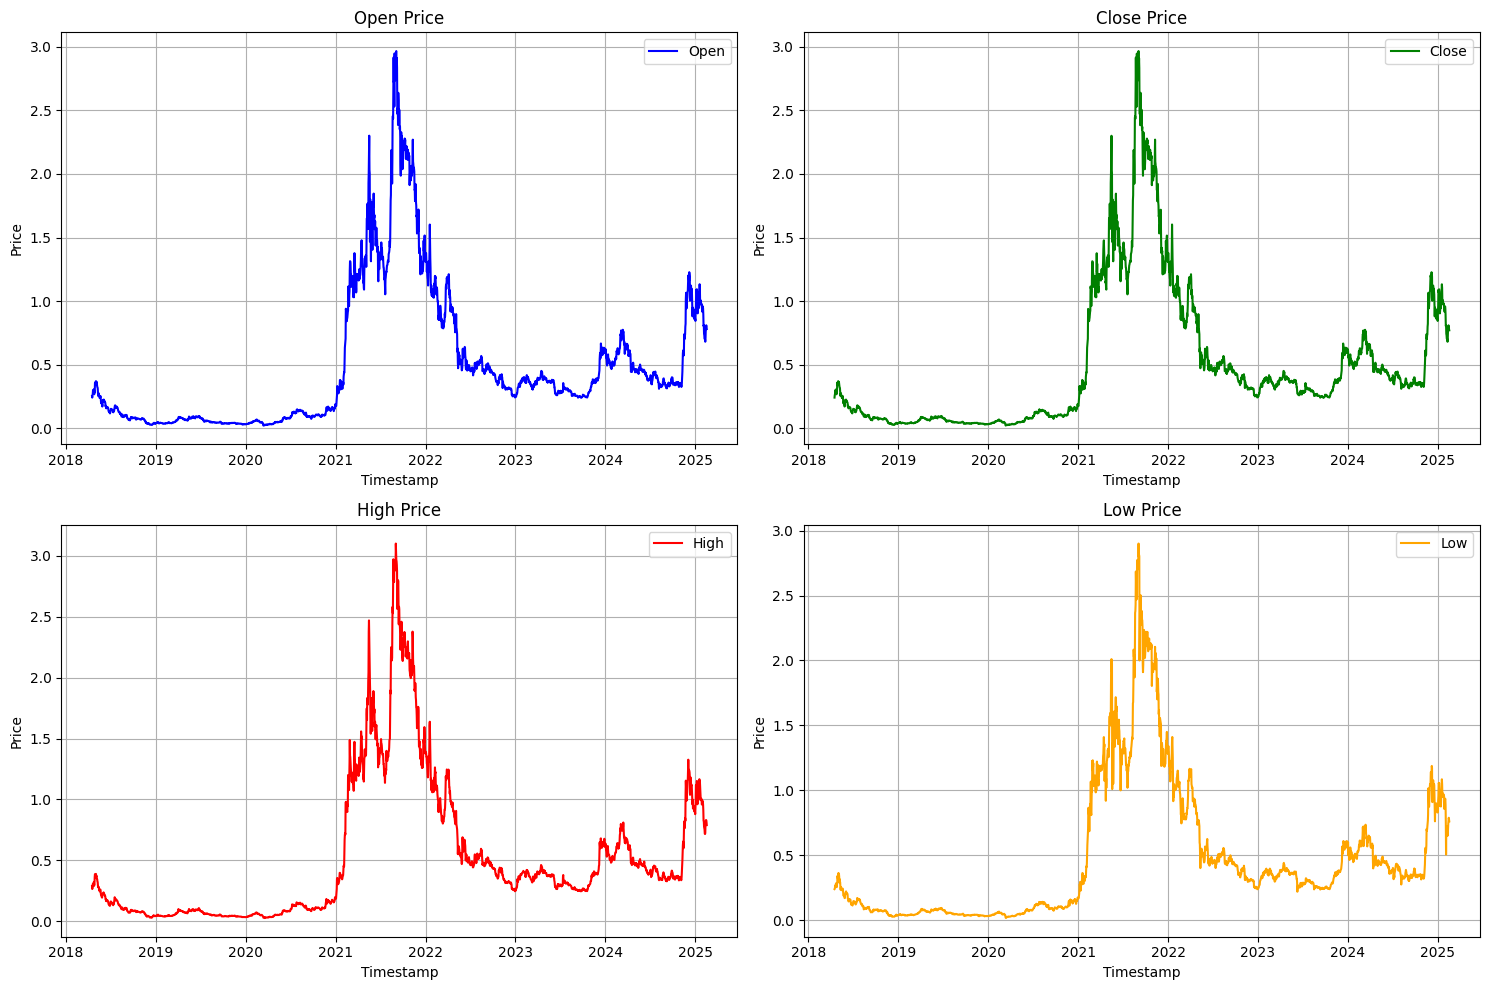

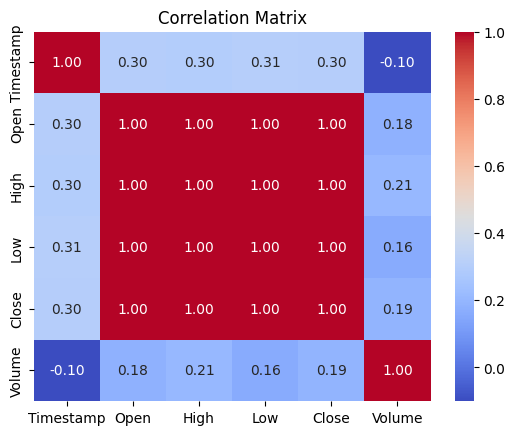

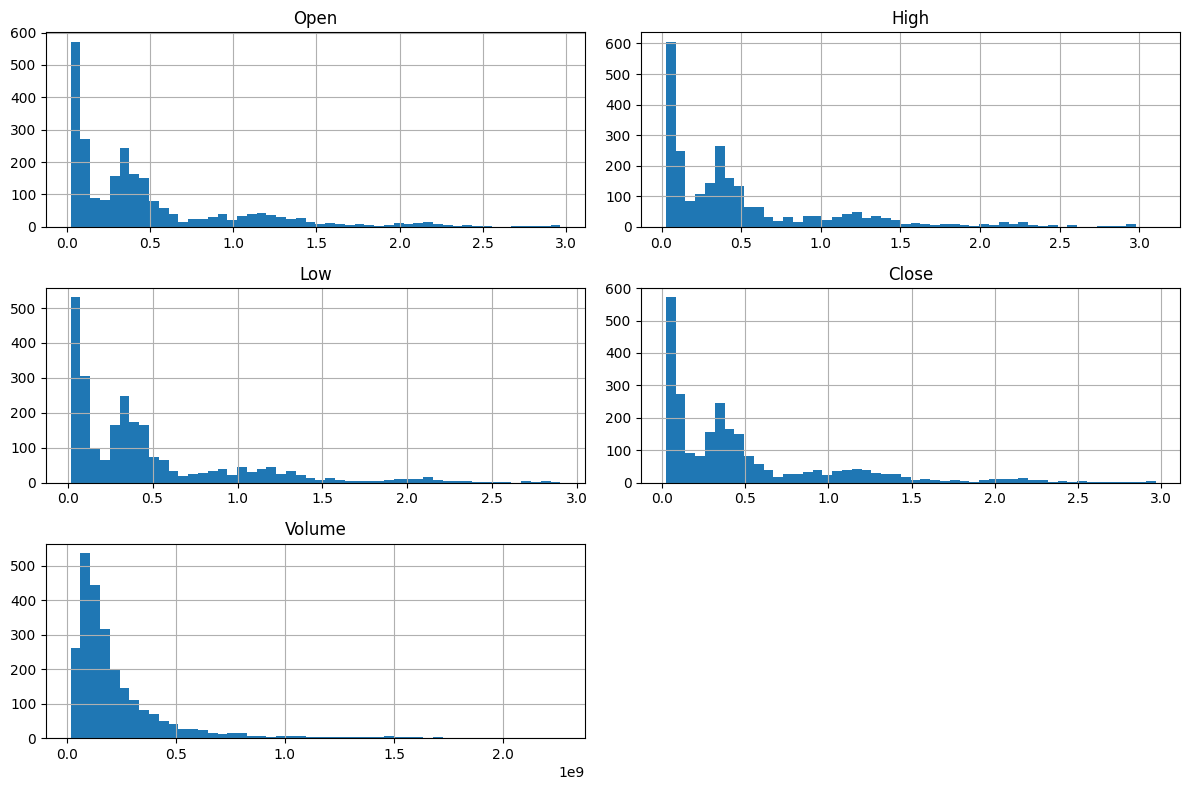

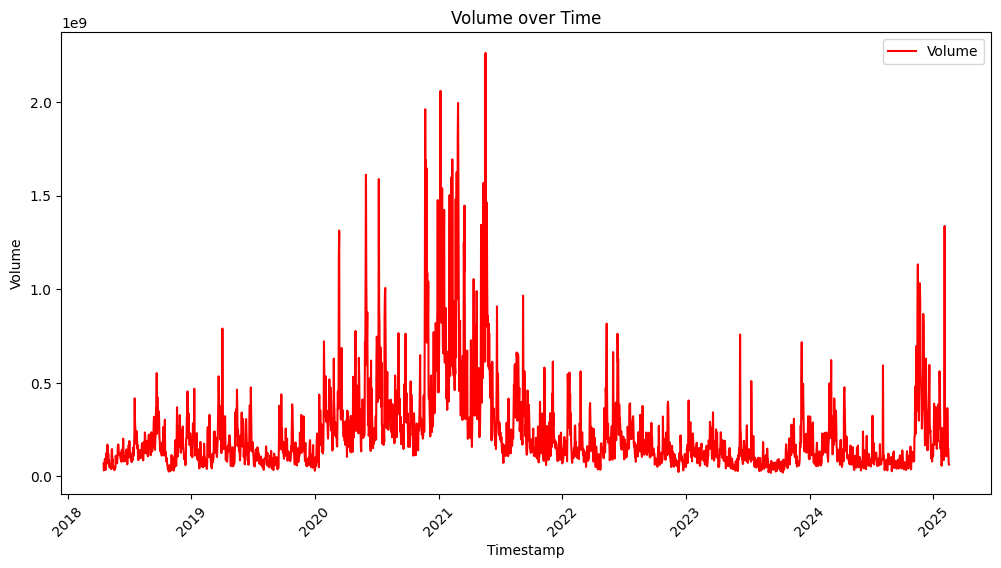

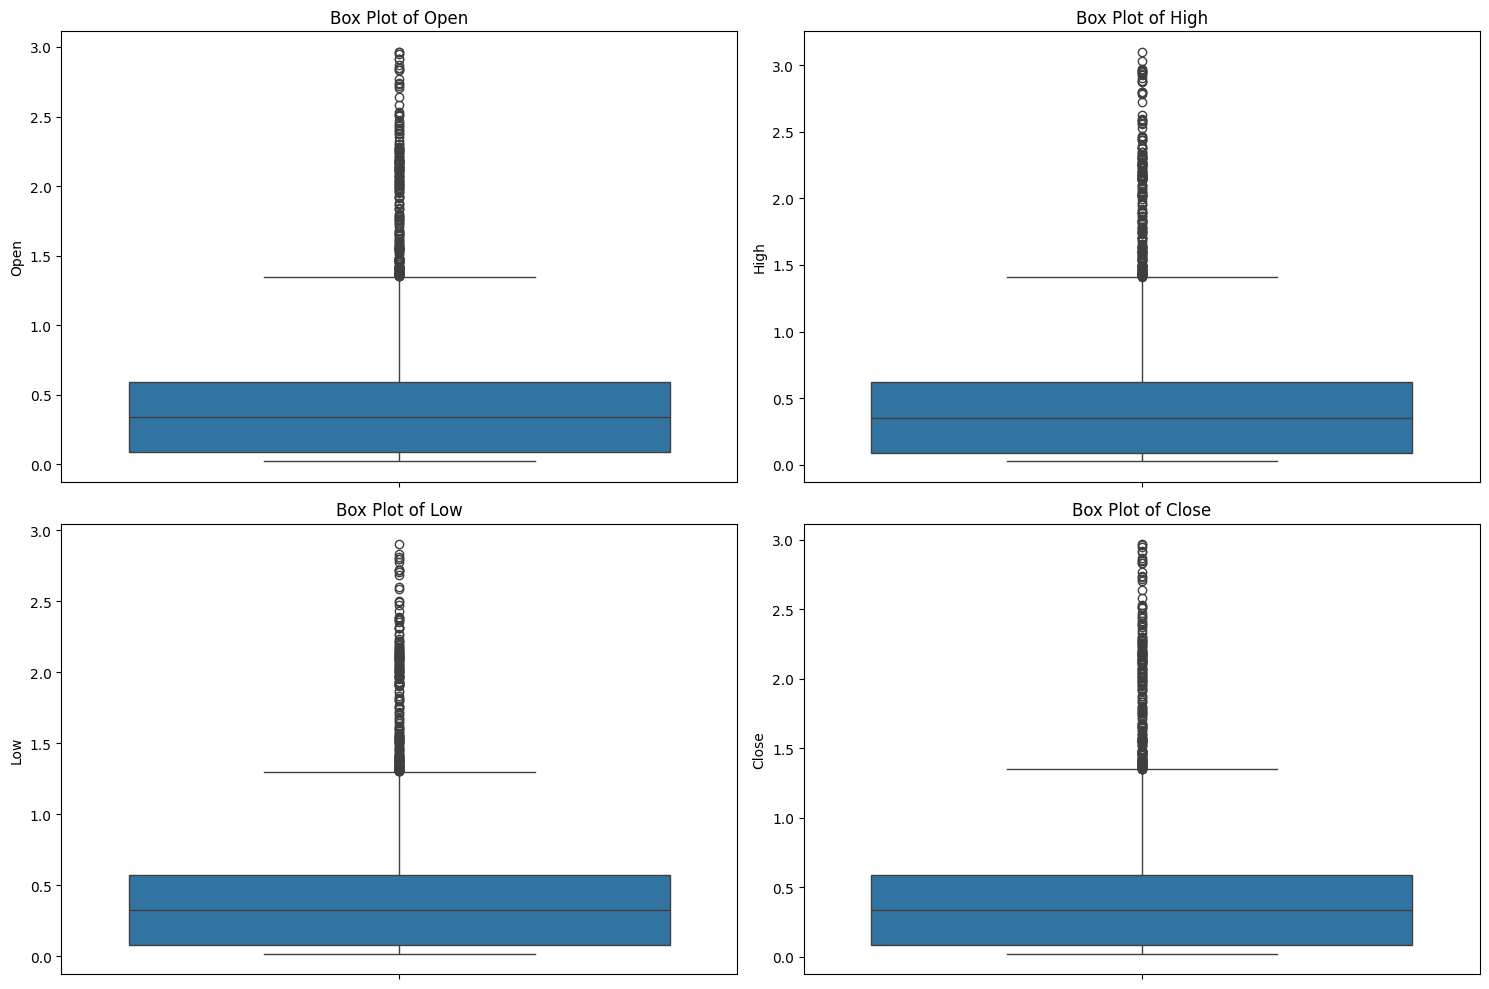

Number of outliers detected in 'Close' based on Z-score: 62

First 10 rows after date feature extraction:
      Open     High      Low    Close        Volume  Day  Month  Year
0  0.25551  0.28800  0.23983  0.24260  6.746229e+07   17      4  2018
1  0.24260  0.26460  0.24201  0.26200  3.132810e+07   18      4  2018
2  0.26199  0.27500  0.25777  0.27004  5.085998e+07   19      4  2018
3  0.27004  0.30442  0.26648  0.30108  7.108428e+07   20      4  2018
4  0.30161  0.30700  0.26509  0.28668  9.271984e+07   21      4  2018
5  0.28669  0.29730  0.27716  0.28160  4.869383e+07   22      4  2018
6  0.28160  0.28867  0.28064  0.28788  3.434126e+07   23      4  2018
7  0.28798  0.32000  0.28593  0.30853  9.052606e+07   24      4  2018
8  0.30850  0.31099  0.25730  0.26870  1.246885e+08   25      4  2018
9  0.26870  0.29390  0.25500  0.29326  6.810963e+07   26      4  2018

----------------------------------------------------------------------------------------------------


====================

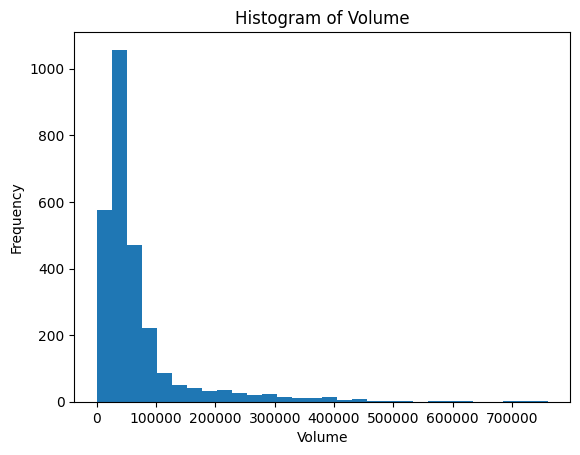

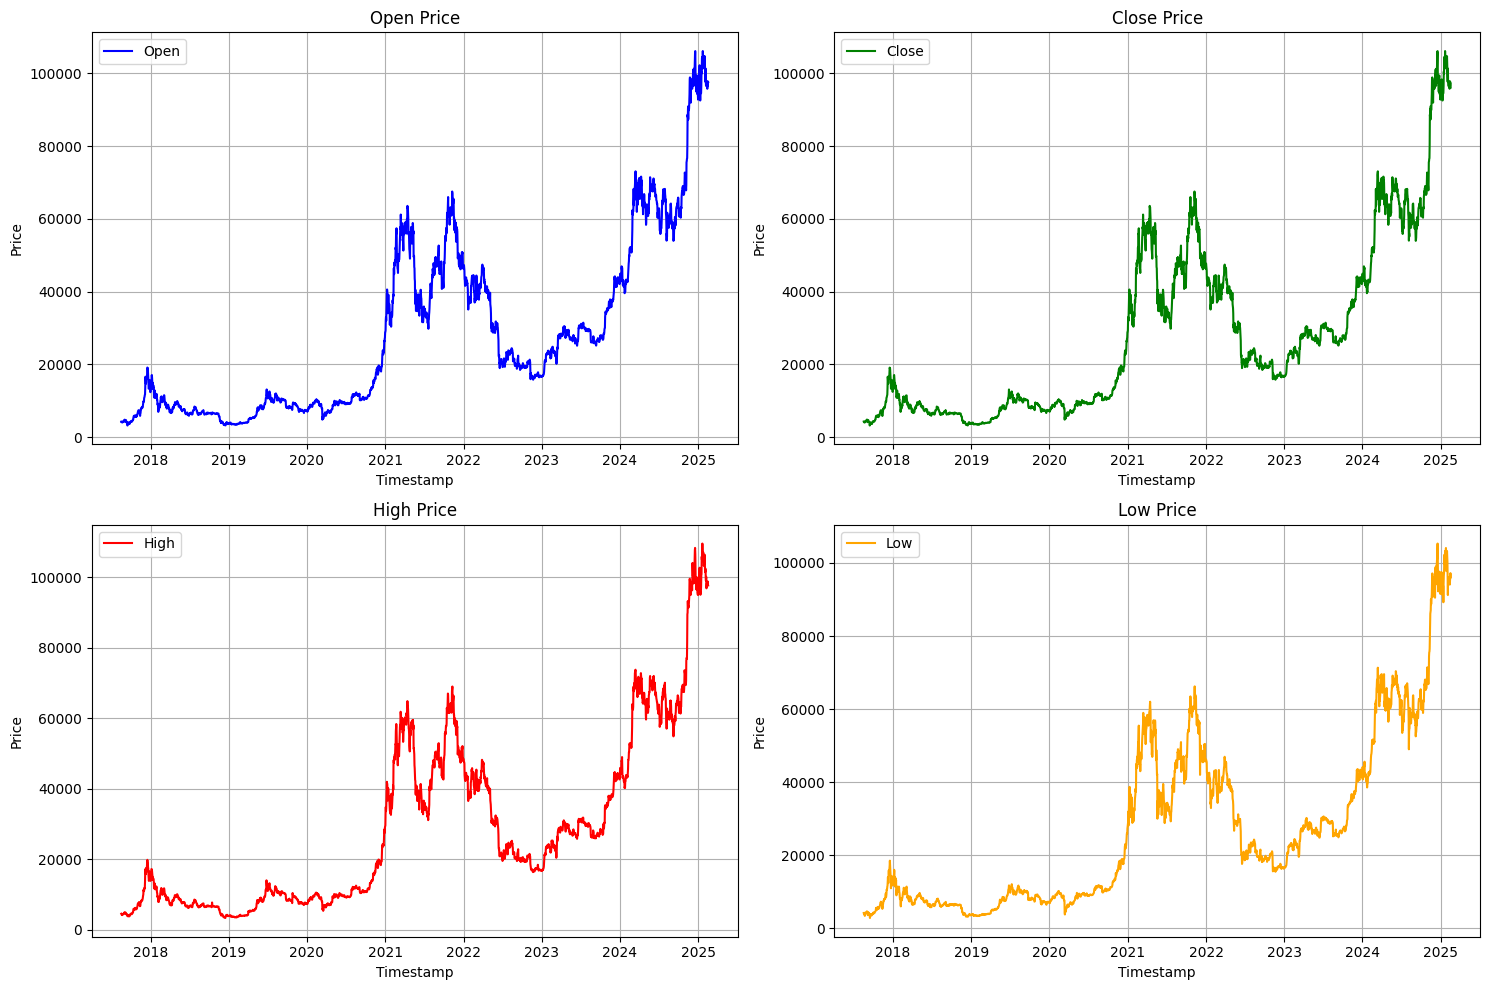

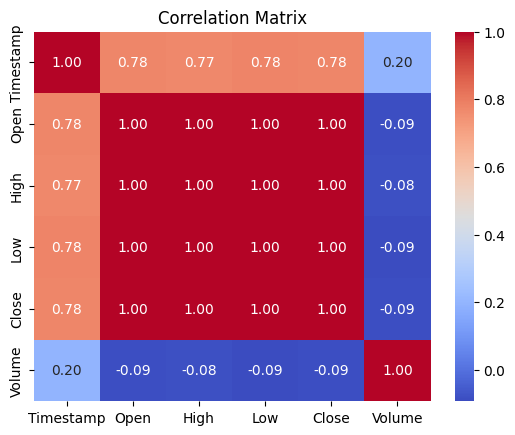

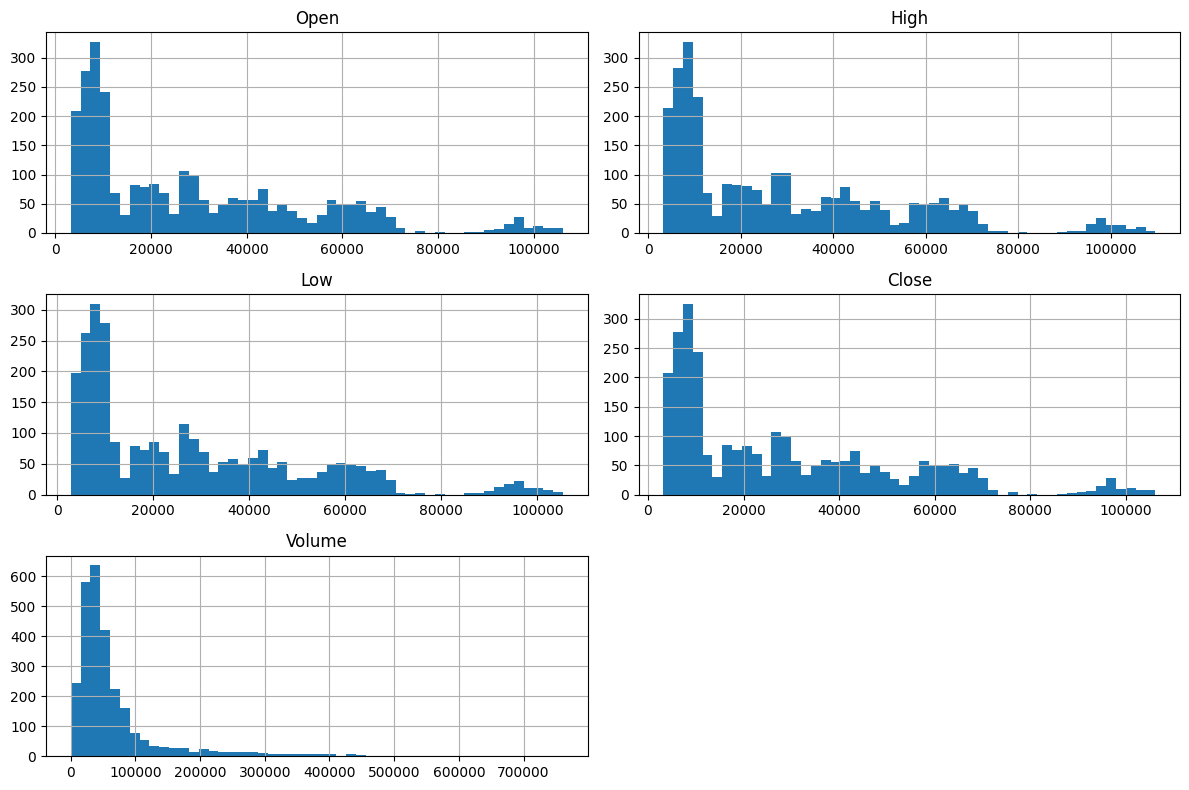

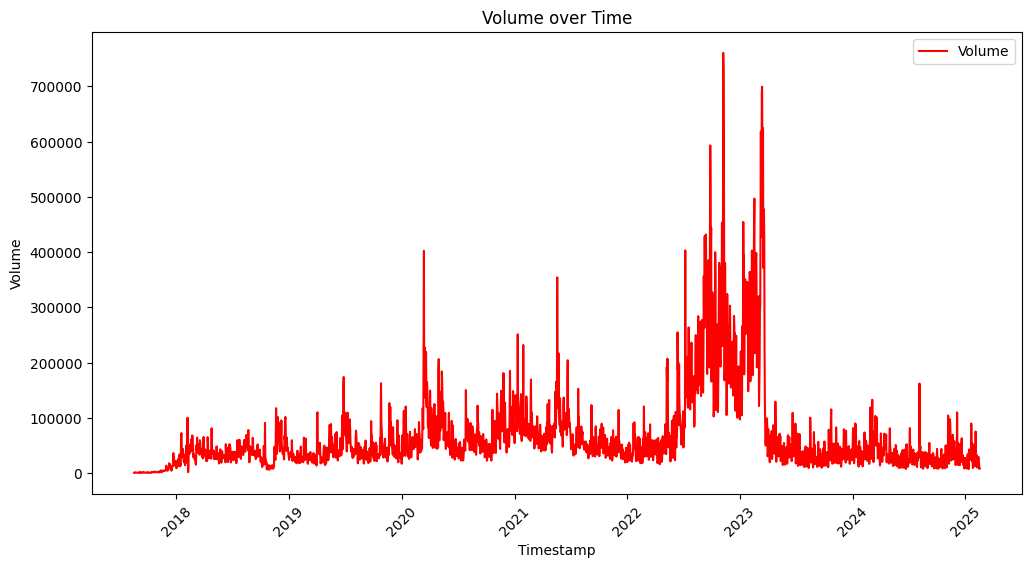

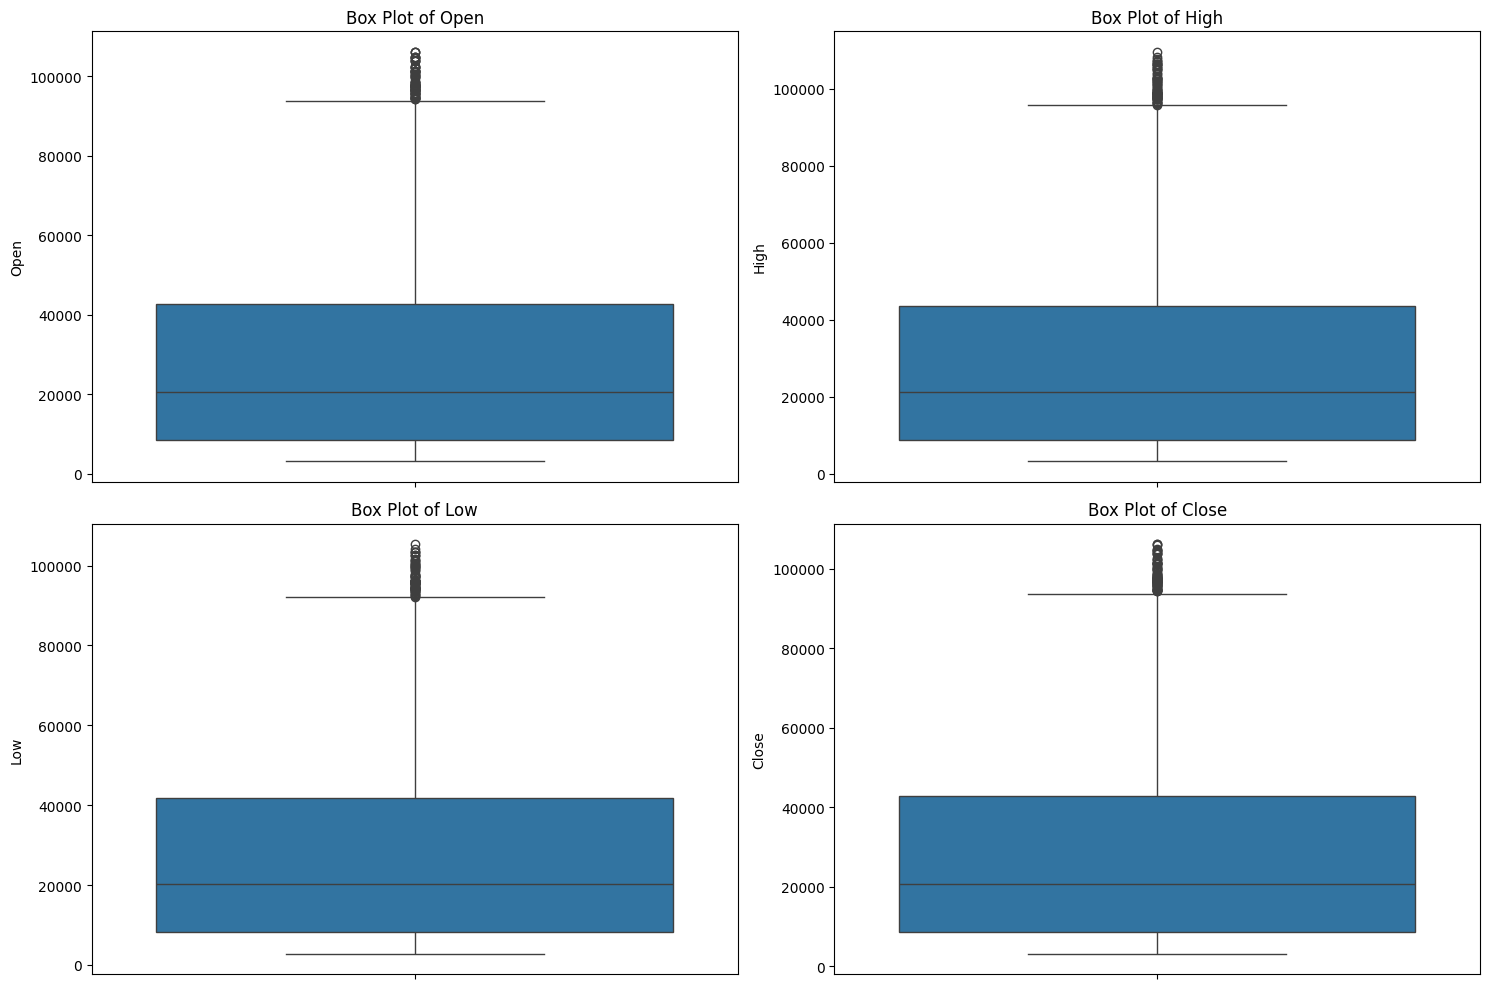

Number of outliers detected in 'Close' based on Z-score: 30

First 10 rows after date feature extraction:
      Open     High      Low    Close       Volume  Day  Month  Year
0  4261.48  4485.39  4200.74  4285.08   795.150377   17      8  2017
1  4285.08  4371.52  3938.77  4108.37  1199.888264   18      8  2017
2  4108.37  4184.69  3850.00  4139.98   381.309763   19      8  2017
3  4120.98  4211.08  4032.62  4086.29   467.083022   20      8  2017
4  4069.13  4119.62  3911.79  4016.00   691.743060   21      8  2017
5  4016.00  4104.82  3400.00  4040.00   966.684858   22      8  2017
6  4040.00  4265.80  4013.89  4114.01  1001.136565   23      8  2017
7  4147.00  4371.68  4085.01  4316.01   787.418753   24      8  2017
8  4316.01  4453.91  4247.48  4280.68   573.612740   25      8  2017
9  4280.71  4367.00  4212.41  4337.44   228.108068   26      8  2017

----------------------------------------------------------------------------------------------------


==================== EDA for da

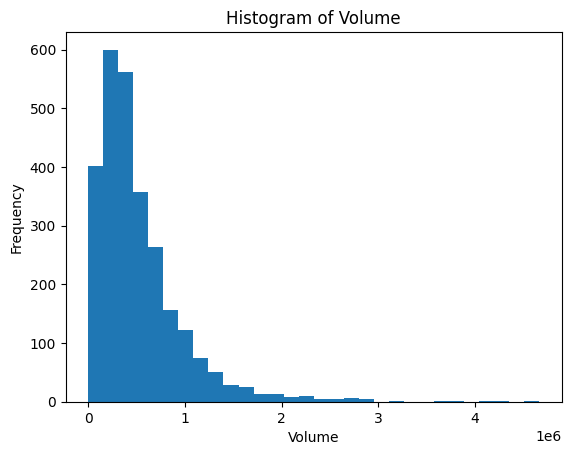

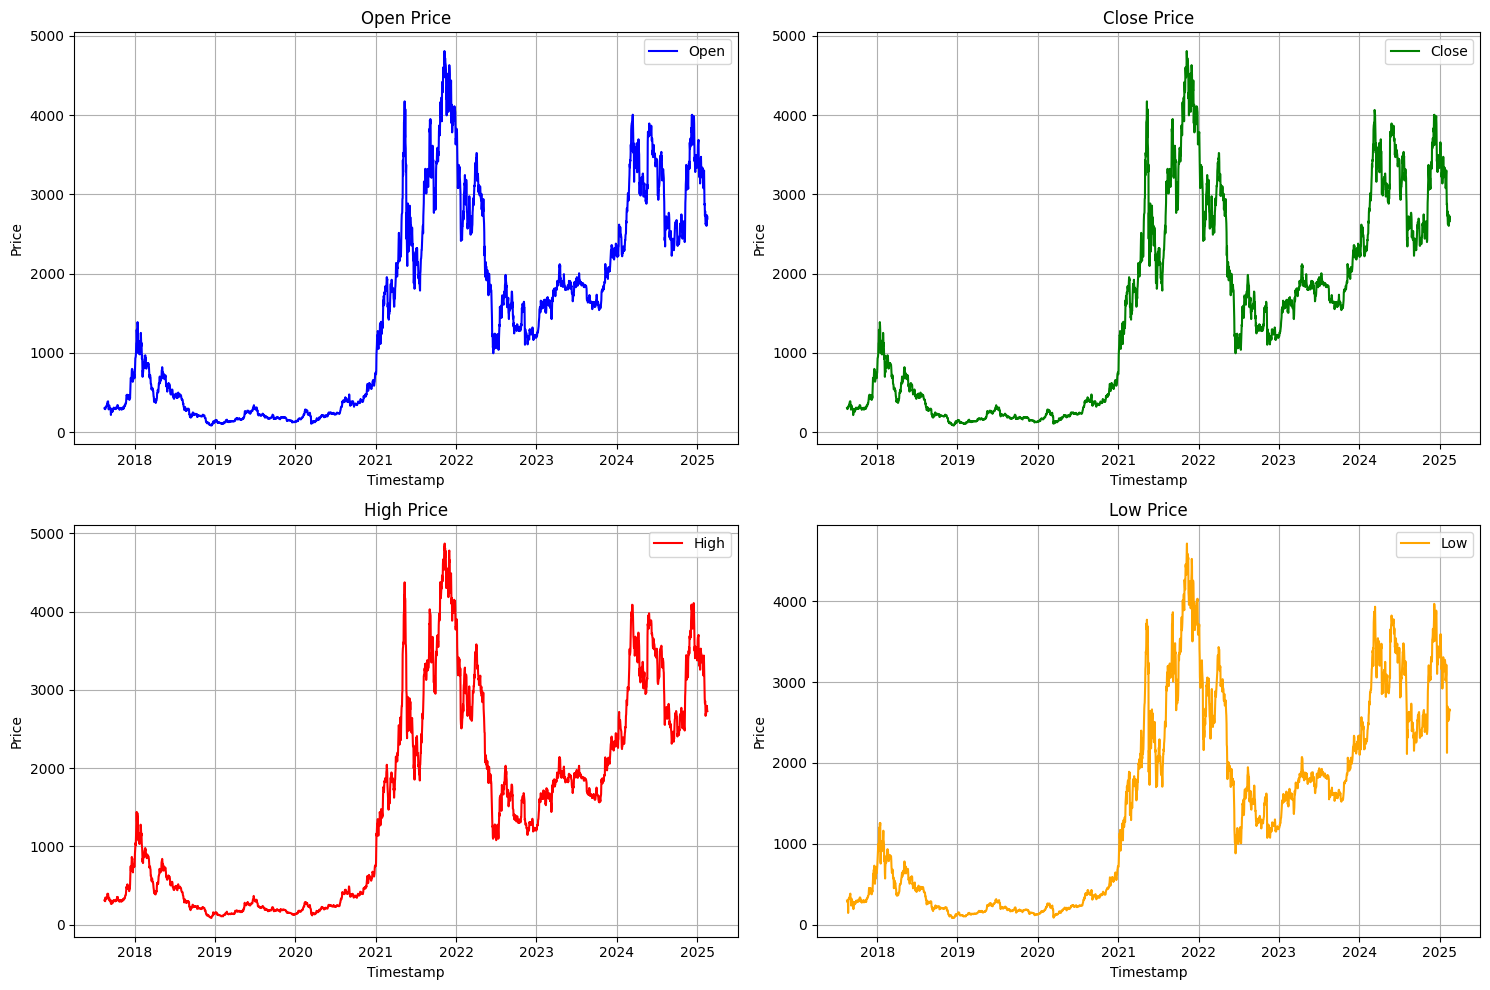

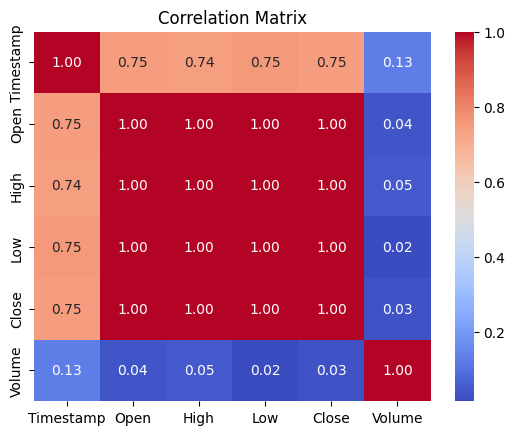

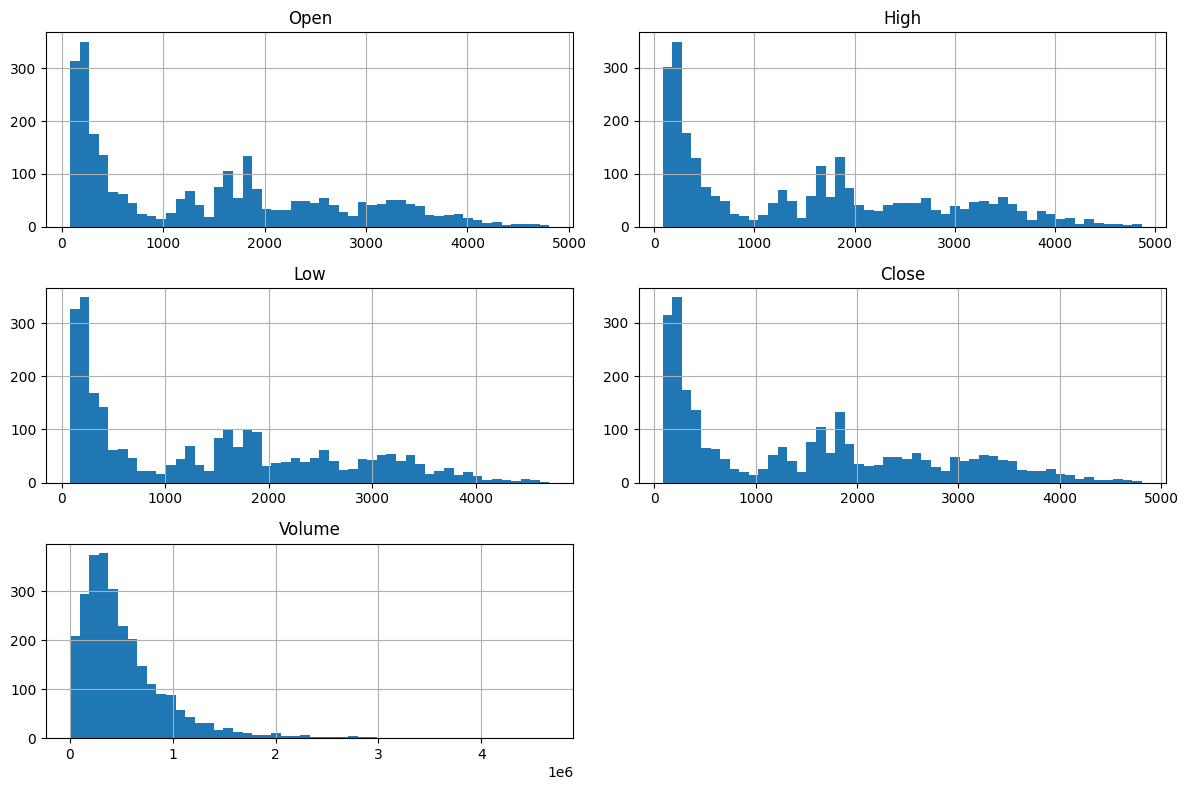

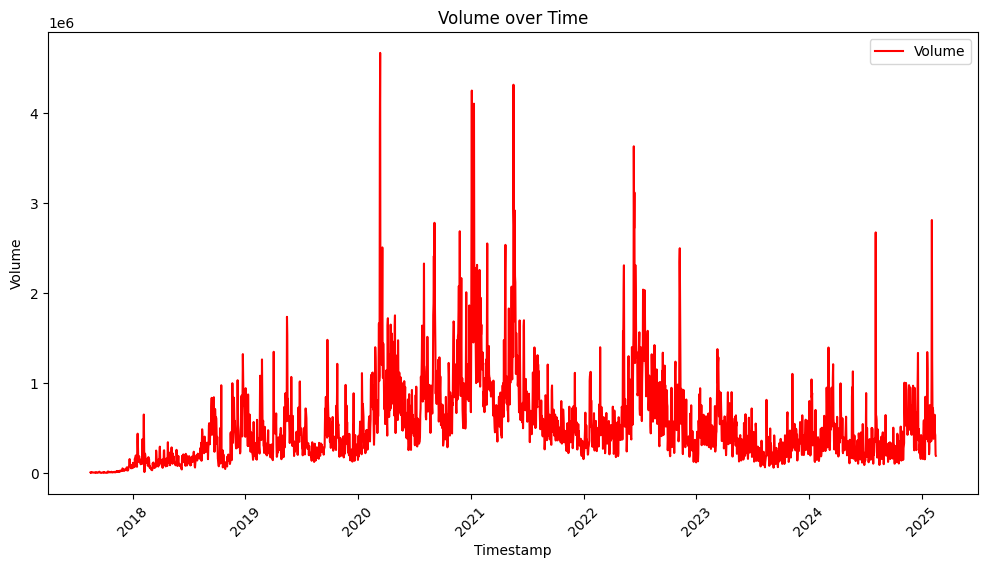

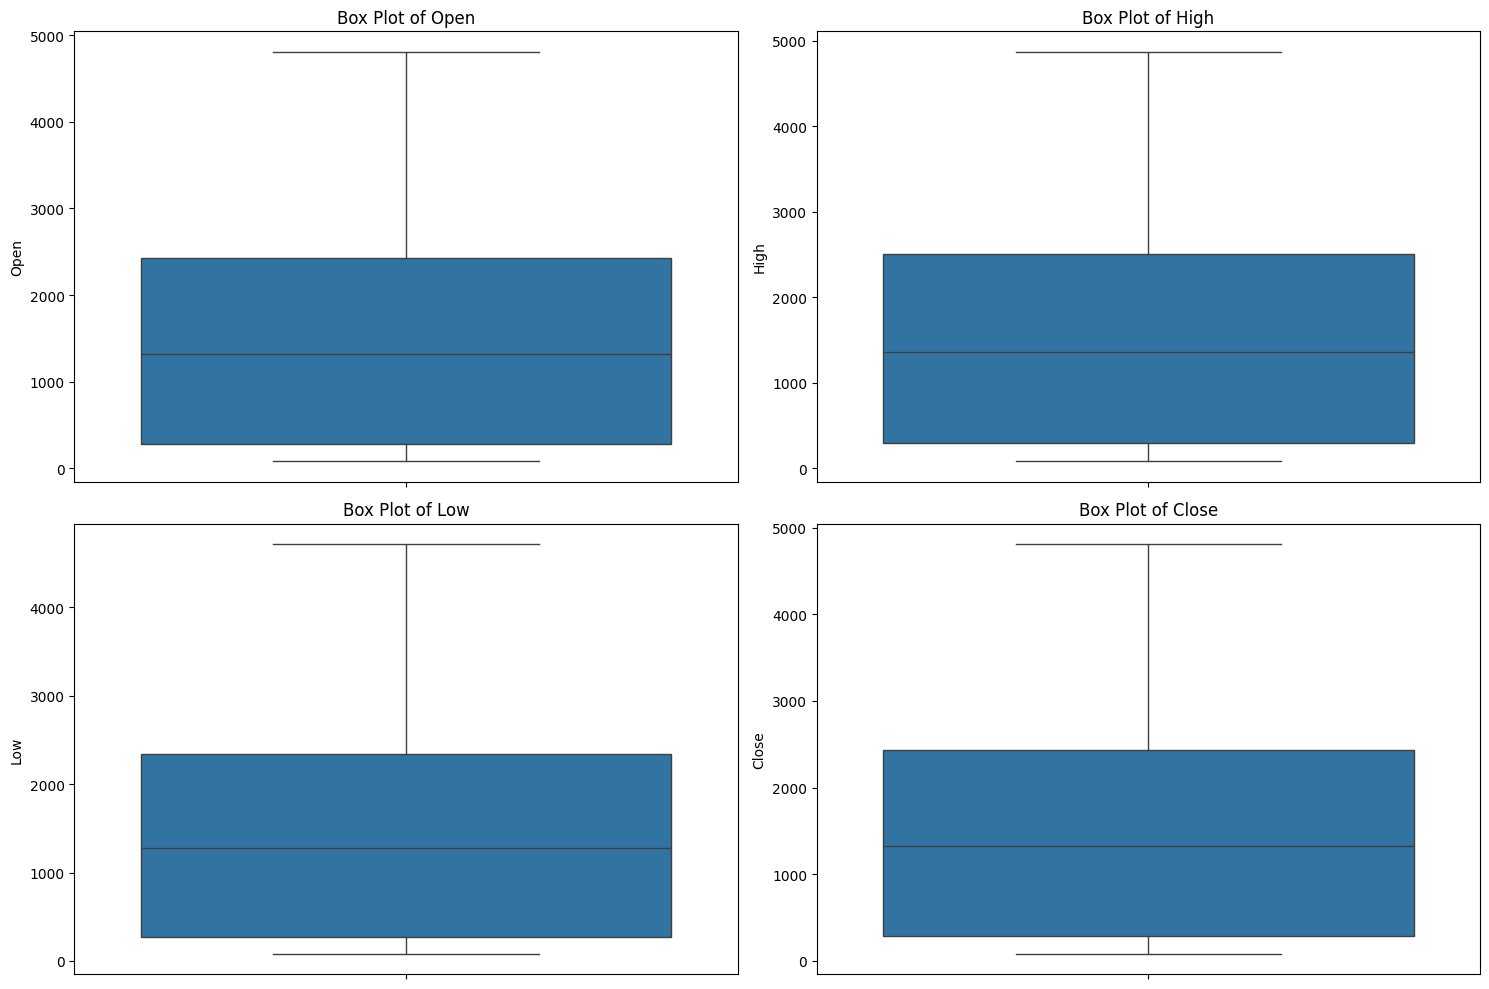

Number of outliers detected in 'Close' based on Z-score: 0

First 10 rows after date feature extraction:
     Open    High     Low   Close      Volume  Day  Month  Year
0  301.13  312.18  298.00  302.00  7030.71034   17      8  2017
1  302.00  311.79  283.94  293.96  9537.84646   18      8  2017
2  293.31  299.90  278.00  290.91  2146.19773   19      8  2017
3  289.41  300.53  282.85  299.10  2510.13871   20      8  2017
4  299.10  346.52  294.60  323.29  5219.44542   21      8  2017
5  321.04  330.41  144.21  309.80  7956.35088   22      8  2017
6  312.25  324.99  309.41  315.74  8665.72569   23      8  2017
7  315.74  328.04  314.01  323.42  6753.27192   24      8  2017
8  323.42  338.28  323.42  327.24  7125.96962   25      8  2017
9  327.24  335.44  323.41  330.79  4877.68521   26      8  2017

----------------------------------------------------------------------------------------------------


==================== EDA for data\SOL_USDT.csv ====================

Basic Information:

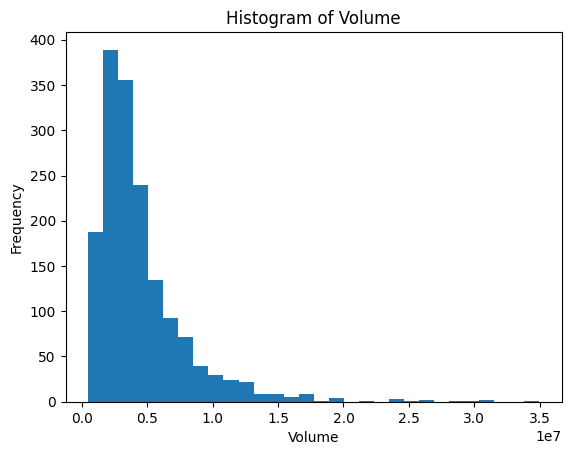

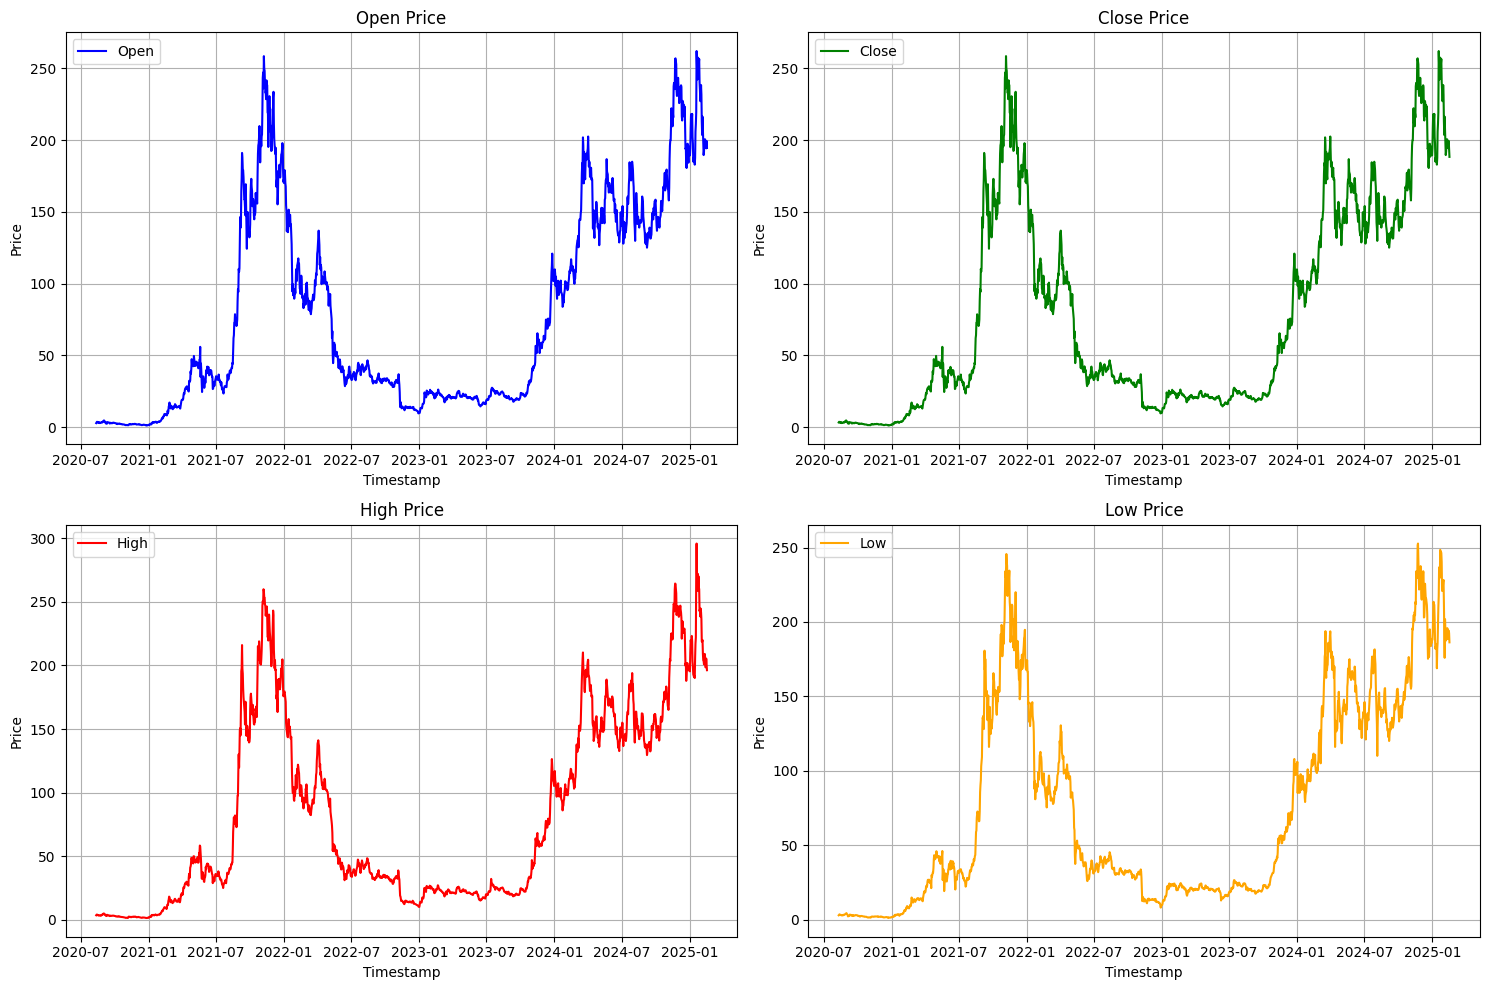

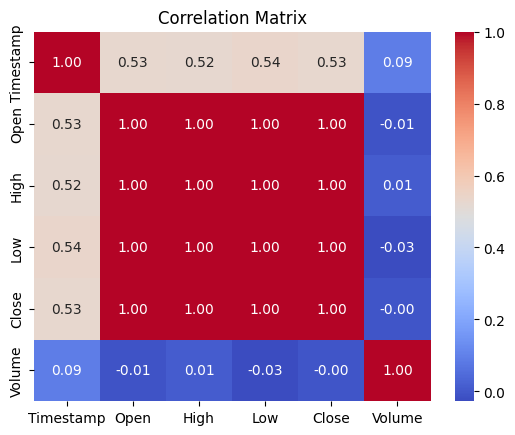

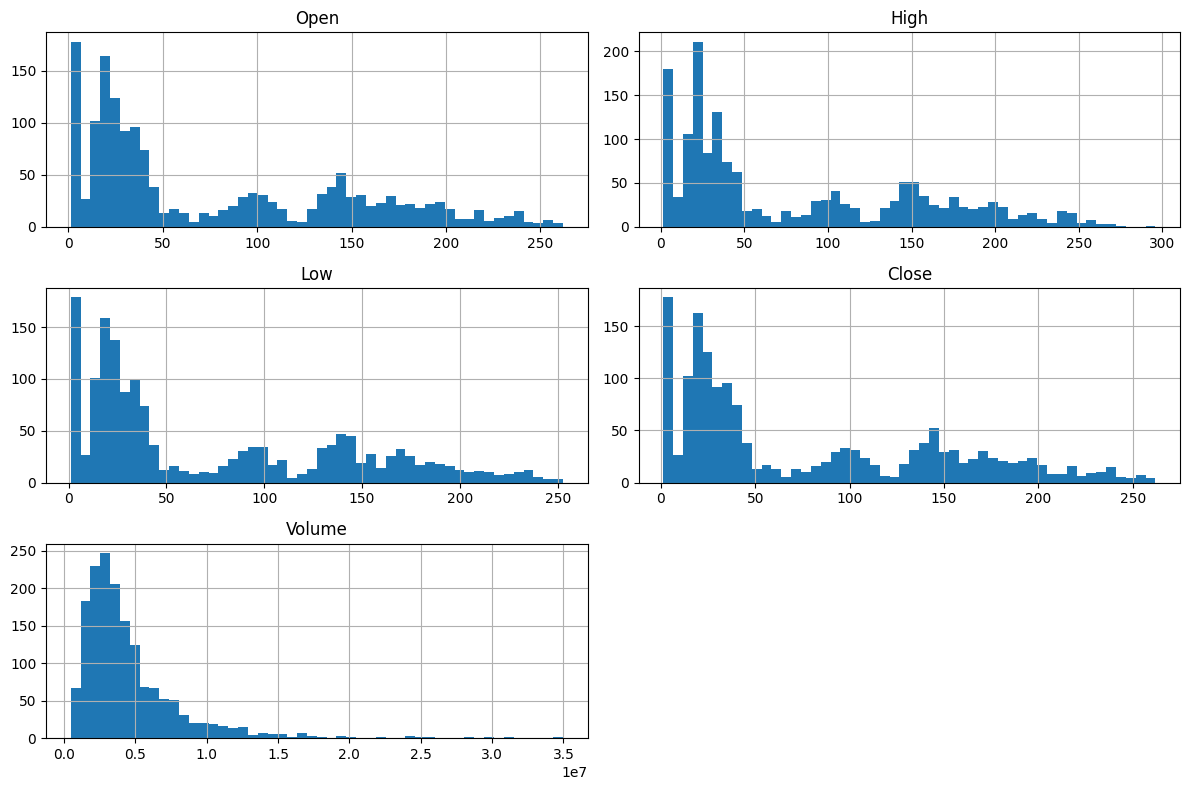

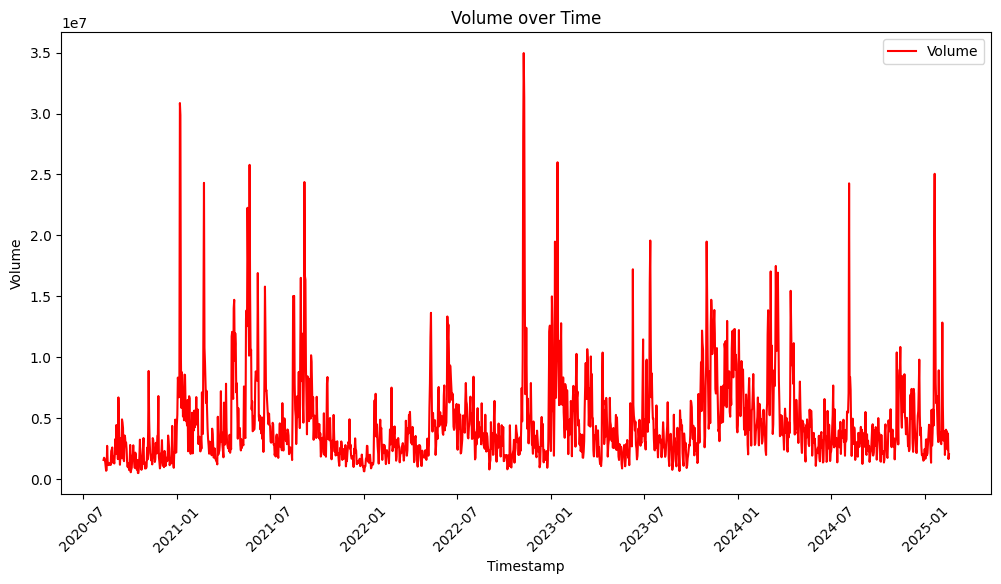

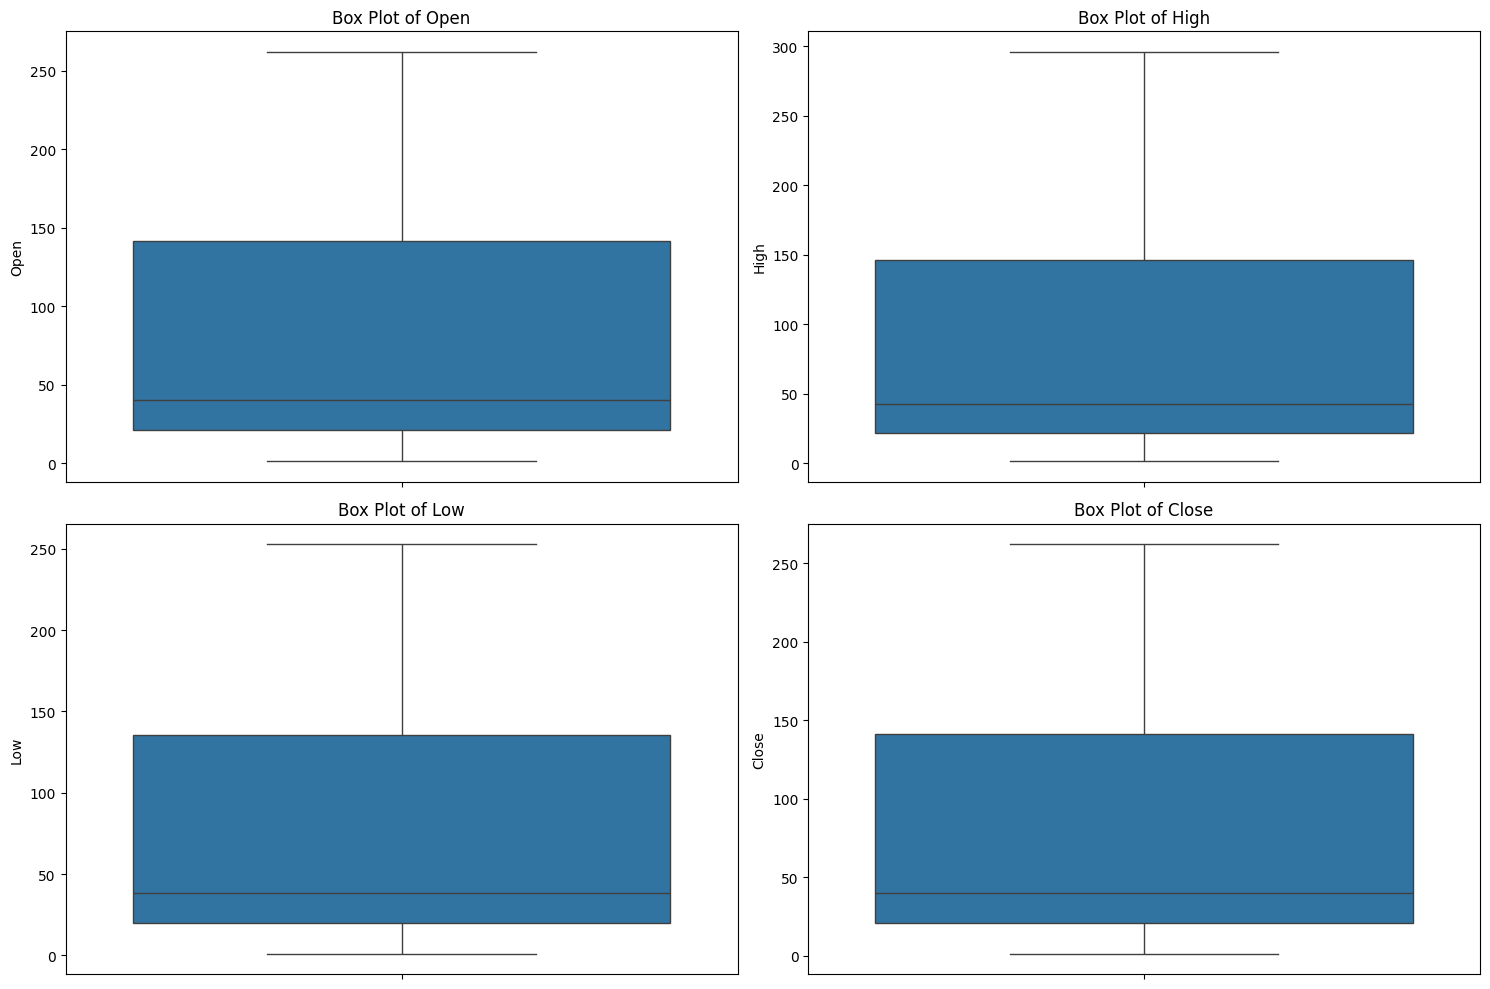

Number of outliers detected in 'Close' based on Z-score: 0

First 10 rows after date feature extraction:
     Open    High     Low   Close      Volume  Day  Month  Year
0  2.8500  3.5208  2.8433  3.2985  1552384.78   11      8  2020
1  3.2985  3.9289  3.0800  3.7558  1737042.95   12      8  2020
2  3.7500  4.1387  3.5003  3.7300  1685759.24   13      8  2020
3  3.7207  3.7676  3.3210  3.4099  1474161.79   14      8  2020
4  3.4181  3.7400  3.1500  3.1730  1070233.20   15      8  2020
5  3.1730  3.4907  3.1200  3.3885   668106.53   16      8  2020
6  3.3885  3.3952  3.1000  3.1100   729413.64   17      8  2020
7  3.1100  3.7092  2.8105  3.3407  2713115.94   18      8  2020
8  3.3340  3.4900  2.8000  2.8868  1433243.76   19      8  2020
9  2.8962  3.4450  2.8871  3.2038  1277827.32   20      8  2020

----------------------------------------------------------------------------------------------------


==================== EDA for data\XRP_USDT.csv ====================

Basic Information:

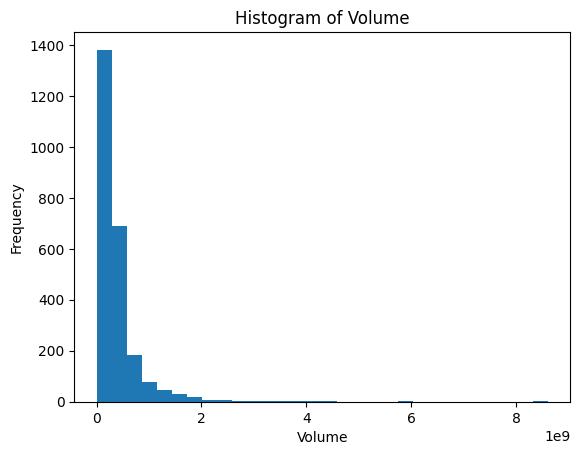

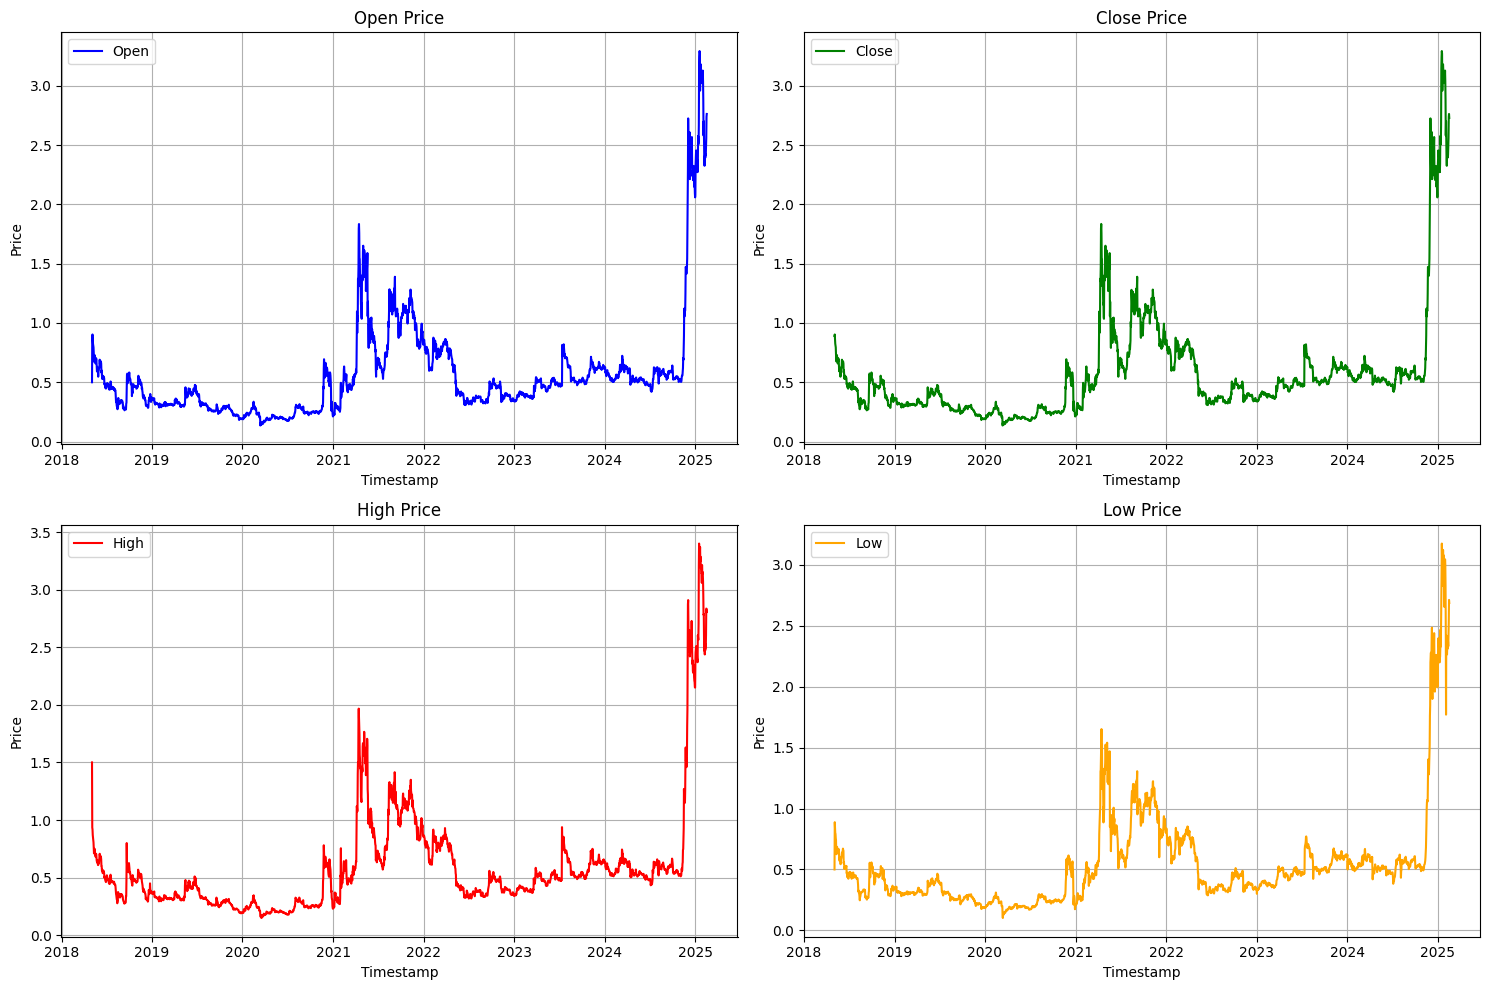

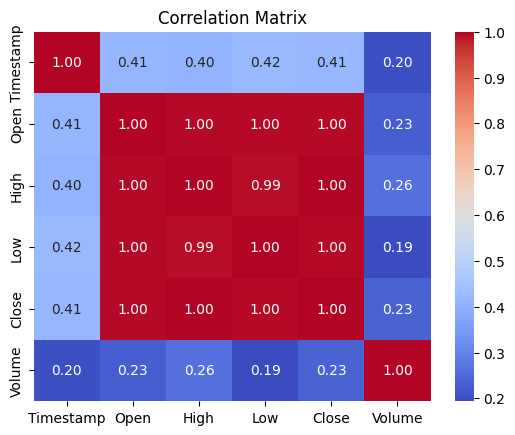

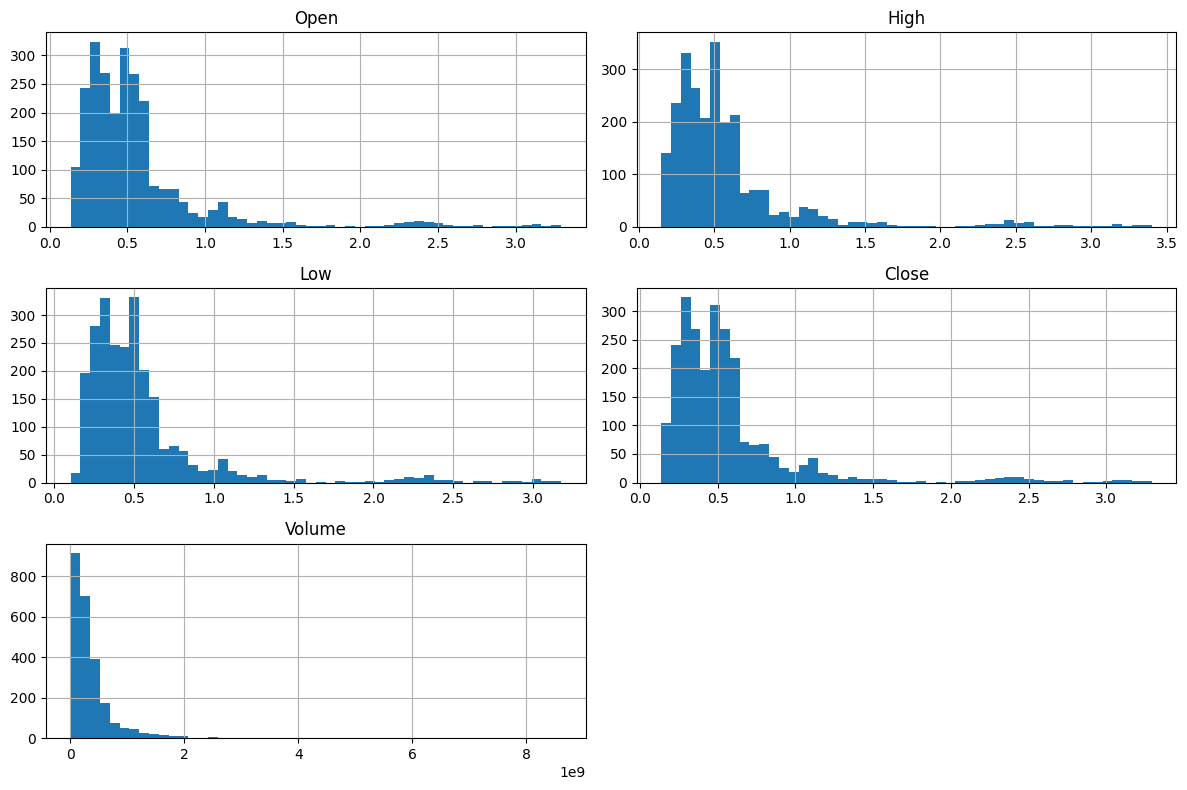

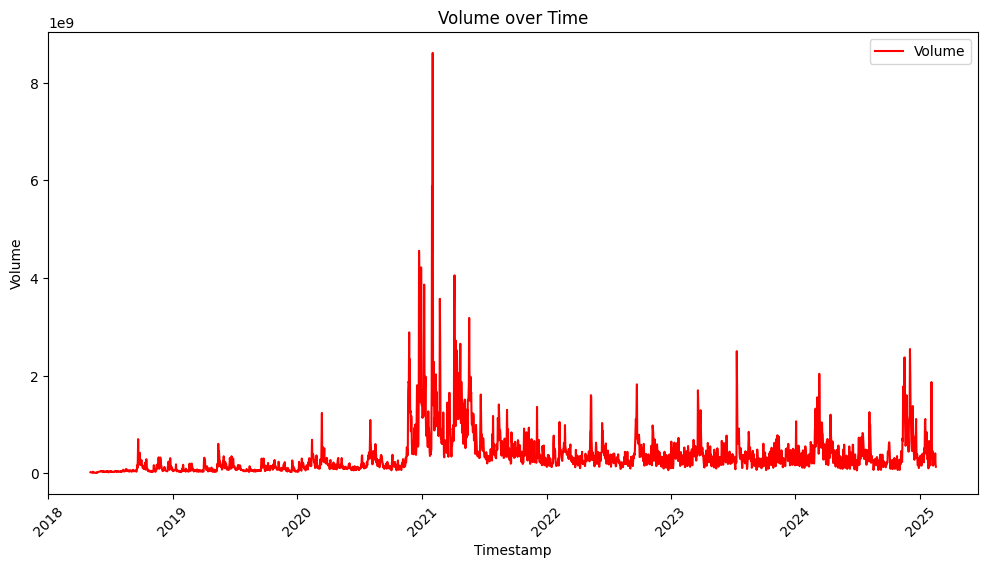

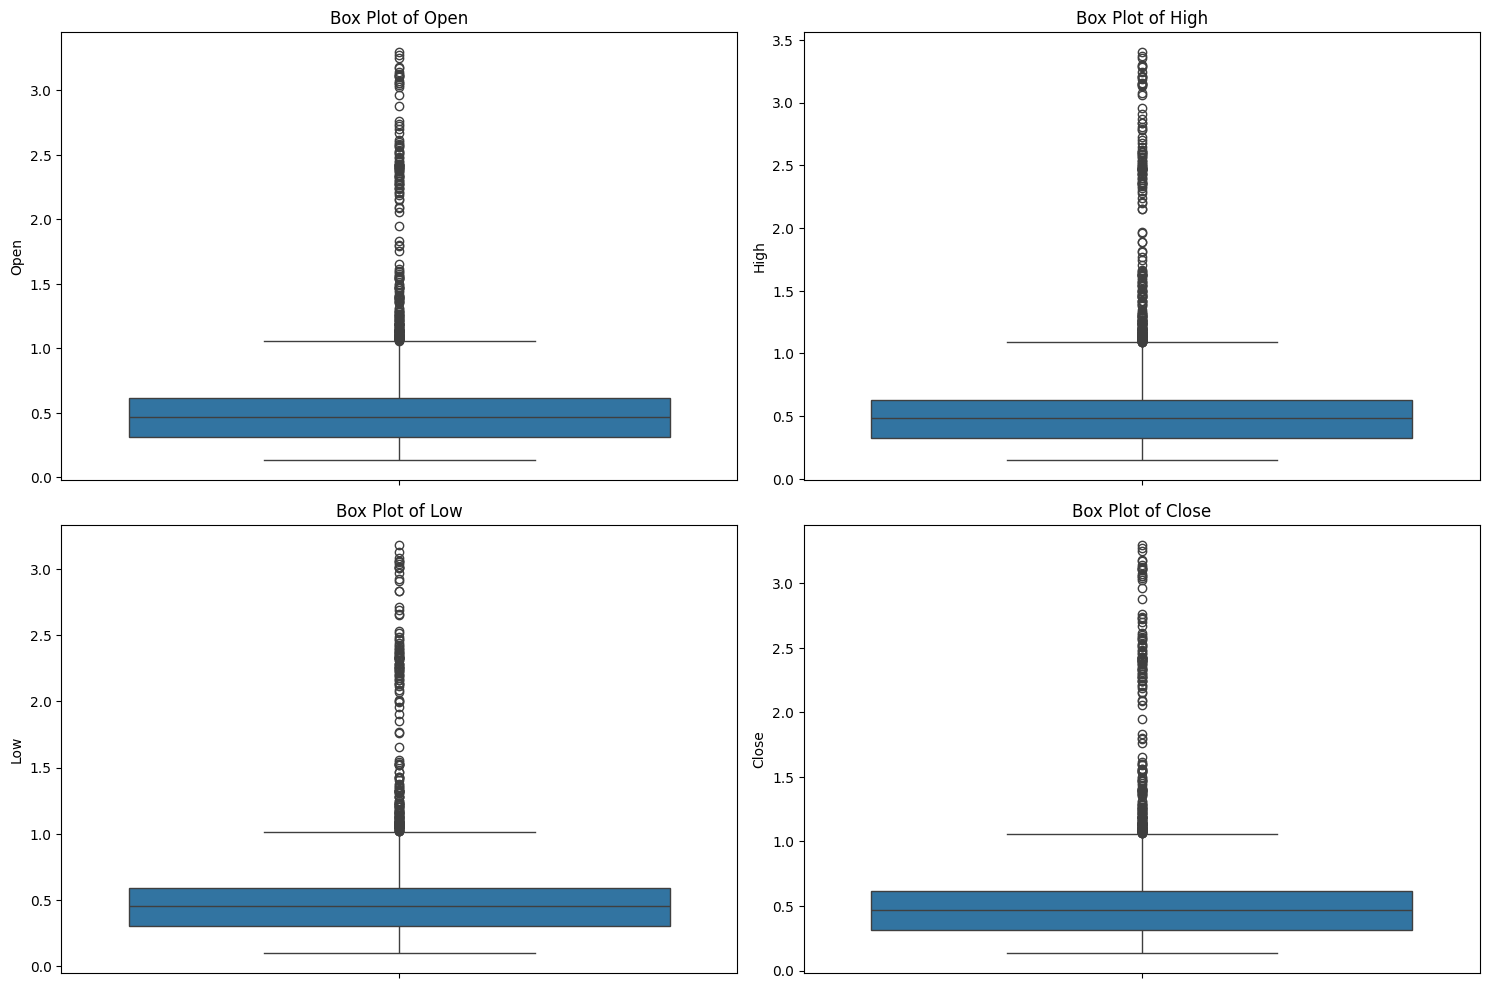

Number of outliers detected in 'Close' based on Z-score: 79

First 10 rows after date feature extraction:
      Open     High      Low    Close       Volume  Day  Month  Year
0  0.50000  1.50000  0.50000  0.88990  20890213.82    4      5  2018
1  0.88980  0.93500  0.88800  0.90280  16816165.30    5      5  2018
2  0.90280  0.91800  0.83774  0.86483  16002035.80    6      5  2018
3  0.86482  0.86886  0.80000  0.82490  17303486.40    7      5  2018
4  0.82490  0.84802  0.79200  0.80667  12971303.18    8      5  2018
5  0.80667  0.81894  0.75690  0.79481  13982375.89    9      5  2018
6  0.79481  0.80572  0.74085  0.74558  10136895.73   10      5  2018
7  0.74920  0.75602  0.64758  0.67610  31292480.04   11      5  2018
8  0.67376  0.71000  0.62519  0.68522  18181151.11   12      5  2018
9  0.68192  0.75010  0.66456  0.72999  17521261.77   13      5  2018

----------------------------------------------------------------------------------------------------


In [23]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Get all CSV files in the ../data/ directory
file_paths = glob.glob("../data/*.csv")

# Function to perform EDA on a single cryptocurrency CSV file
def perform_eda_on_file(file_path):
    df = pd.read_csv(file_path, names=['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'])
    
    # To convert the 'Timestamp' column to datetime
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='ms')
    df.columns = df.columns.str.strip()  # Remove any leading or trailing spaces from column names

    print(f"\n\n==================== EDA for {file_path.split('/')[-1]} ====================")
    
    ## Exploratory Data Analysis
    # Check the basic information about the dataset
    print("\nBasic Information:")
    print(df.info())
    
    # Display statistical details
    print("\nStatistical Summary:")
    print(df.describe())
    
    # Checking missing values
    print("\nMissing Values:")
    print(df.isnull().sum())
    
    # Check for duplicate rows
    print("\nDuplicate Rows:")
    print(df.duplicated().sum())

    # Calculate ranges for each numerical column
    range_open = df['Open'].max() - df['Open'].min()
    range_high = df['High'].max() - df['High'].min()
    range_low = df['Low'].max() - df['Low'].min()
    range_close = df['Close'].max() - df['Close'].min()
    range_volume = df['Volume'].max() - df['Volume'].min()

    ranges = {
        'Open': range_open,
        'High': range_high,
        'Low': range_low,
        'Close': range_close,
        'Volume': range_volume
    }

    print("\nRange of each column:")
    print(ranges)
    
    # Find column with maximum range
    max_range_column = max(ranges, key=ranges.get)
    print(f"\nColumn with maximum range: {max_range_column}")

    # Plot histogram for the column with the maximum range
    df[max_range_column].plot(kind='hist', bins=30, title=f'Histogram of {max_range_column}')
    plt.xlabel(max_range_column)
    plt.ylabel('Frequency')
    plt.show()

    # Create a 2x2 grid of subplots for 'Open', 'Close', 'High', and 'Low' prices
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

    # Plot Open on the first subplot
    axs[0, 0].plot(df['Timestamp'], df['Open'], color='blue', label='Open')
    axs[0, 0].set_title('Open Price')
    axs[0, 0].set_xlabel('Timestamp')
    axs[0, 0].set_ylabel('Price')
    axs[0, 0].legend()
    axs[0, 0].grid(True)

    # Plot Close on the second subplot
    axs[0, 1].plot(df['Timestamp'], df['Close'], color='green', label='Close')
    axs[0, 1].set_title('Close Price')
    axs[0, 1].set_xlabel('Timestamp')
    axs[0, 1].set_ylabel('Price')
    axs[0, 1].legend()
    axs[0, 1].grid(True)

    # Plot High on the third subplot
    axs[1, 0].plot(df['Timestamp'], df['High'], color='red', label='High')
    axs[1, 0].set_title('High Price')
    axs[1, 0].set_xlabel('Timestamp')
    axs[1, 0].set_ylabel('Price')
    axs[1, 0].legend()
    axs[1, 0].grid(True)

    # Plot Low on the fourth subplot
    axs[1, 1].plot(df['Timestamp'], df['Low'], color='orange', label='Low')
    axs[1, 1].set_title('Low Price')
    axs[1, 1].set_xlabel('Timestamp')
    axs[1, 1].set_ylabel('Price')
    axs[1, 1].legend()
    axs[1, 1].grid(True)

    # Automatically adjust the layout
    plt.tight_layout()
    plt.show()

    # Plot the correlation matrix
    corr_matrix = df.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.show()

    # Plot the distribution of numerical features
    df[['Open', 'High', 'Low', 'Close', 'Volume']].hist(figsize=(12, 8), bins=50)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.plot(df['Timestamp'], df['Volume'], label='Volume', color='red')
    plt.title('Volume over Time')
    plt.xlabel('Timestamp')
    plt.ylabel('Volume')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

    # Create a 2x2 grid of subplots for boxplots
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

    # Manually create boxplots for each column
    sns.boxplot(data=df['Open'], ax=axs[0, 0])
    axs[0, 0].set_title('Box Plot of Open')

    sns.boxplot(data=df['High'], ax=axs[0, 1])
    axs[0, 1].set_title('Box Plot of High')

    sns.boxplot(data=df['Low'], ax=axs[1, 0])
    axs[1, 0].set_title('Box Plot of Low')

    sns.boxplot(data=df['Close'], ax=axs[1, 1])
    axs[1, 1].set_title('Box Plot of Close')

    # Adjust layout to prevent overlap of titles and labels
    plt.tight_layout()
    plt.show()

    # Z-score calculation to detect outliers (using absolute z-score > 3)
    zs = zscore(df['Close'])
    zs = zs.abs() > 3
    print(f"Number of outliers detected in 'Close' based on Z-score: {np.sum(zs)}")

    # Extract day, month, and year from the 'Timestamp' column
    df['Day'] = df['Timestamp'].dt.day
    df['Month'] = df['Timestamp'].dt.month
    df['Year'] = df['Timestamp'].dt.year
    df = df.drop('Timestamp', axis=1)
    print(f"\nFirst 10 rows after date feature extraction:")
    print(df.head(10))

# Loop through each CSV file and apply the EDA function
for file_path in file_paths:
    perform_eda_on_file(file_path)
    print("\n" + "-"*100)  # Separator between results for different files


In [25]:
# To read data and specify column names
df = pd.read_csv("../data/BTC_USDT.csv", names=['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'])

# To convert the 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='ms')


In [26]:
import pandas as pd

# Function to detect and remove outliers based on IQR
def remove_outliers_iqr(df1):
    # Get the numerical columns
    numeric_cols = df1.select_dtypes(include=['float64', 'int64']).columns
    
    for col in numeric_cols:
        Q1 = df1[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = df1[col].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1  # Interquartile range
        
        # Defining outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filtering the data
        df1 = df1[(df1[col] >= lower_bound) & (df1[col] <= upper_bound)]
    
    return df

# Example usage
df_cleaned = remove_outliers_iqr(df1)


In [27]:
df_cleaned

,Timestamp,Open,High,Low,Close,Volume
0,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377
1,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264
2,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763
3,2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022
4,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060
...,...,...,...,...,...,...
2709,2025-02-12,95778.21,98119.99,94088.23,97869.99,29151.166250
2710,2025-02-13,97870.00,98083.91,95217.36,96608.14,19921.776160
2711,2025-02-14,96608.13,98826.00,96252.82,97500.48,18173.026460
2712,2025-02-15,97500.47,97972.26,97223.58,97569.66,7349.376830


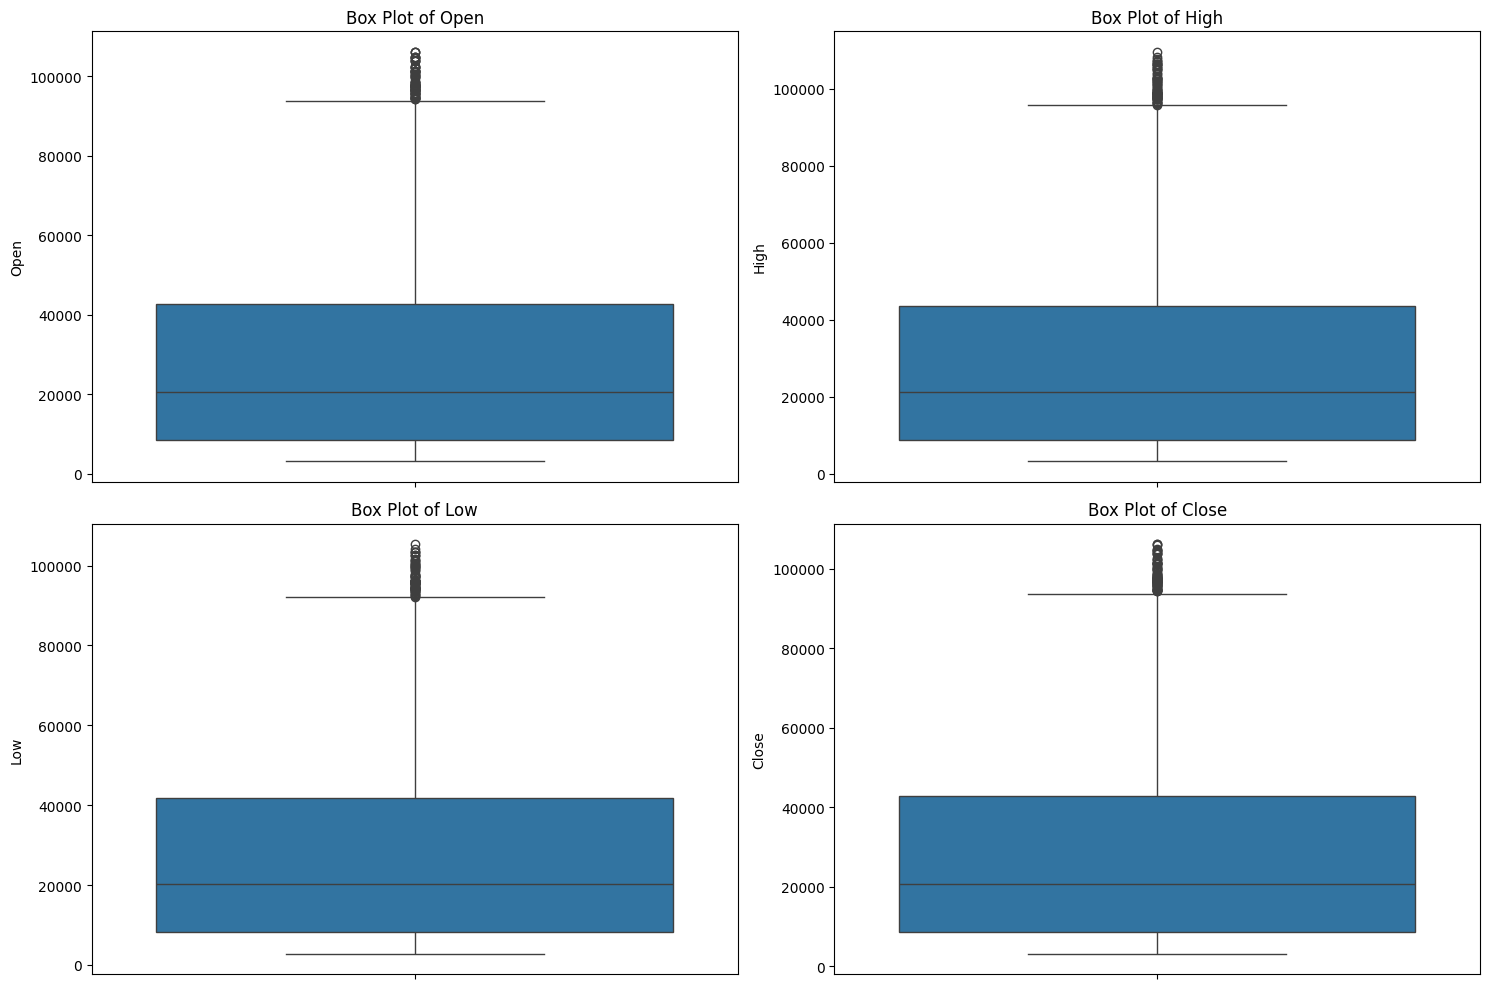

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Manually create boxplots for each column
sns.boxplot(data=df['Open'], ax=axs[0, 0])
axs[0, 0].set_title('Box Plot of Open')

sns.boxplot(data=df['High'], ax=axs[0, 1])
axs[0, 1].set_title('Box Plot of High')

sns.boxplot(data=df['Low'], ax=axs[1, 0])
axs[1, 0].set_title('Box Plot of Low')

sns.boxplot(data=df['Close'], ax=axs[1, 1])
axs[1, 1].set_title('Box Plot of Close')

# Adjust layout to prevent overlap of titles and labels
plt.tight_layout()
plt.show()

In [35]:
# To read data and specify column names
df = pd.read_csv("../data/BTC_USDT.csv", names=['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'])

# To convert the 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='ms')


In [37]:
# Function to cap values above the upper bound for each column
def cap_outliers_iqr(df, columns):
    for col in columns:
        # Calculate Q1 (25th percentile), Q3 (75th percentile), and IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define upper bound
        upper_bound = Q3 + 1.5 * IQR
        
        # Cap values above the upper bound to the upper bound
        df[col] = df[col].apply(lambda x: min(x, upper_bound))
    
    return df

# Columns to check for outliers
columns_to_check = ['Open', 'High', 'Low', 'Close', 'Volume']

# Apply the IQR method to cap the values
df_cleaned = cap_outliers_iqr(df, columns_to_check)

# Display the cleaned data
print(df_cleaned)

      Timestamp        Open         High        Low      Close        Volume
0    2017-08-17   4261.4800   4485.39000   4200.740   4285.080    795.150377
1    2017-08-18   4285.0800   4371.52000   3938.770   4108.370   1199.888264
2    2017-08-19   4108.3700   4184.69000   3850.000   4139.980    381.309763
3    2017-08-20   4120.9800   4211.08000   4032.620   4086.290    467.083022
4    2017-08-21   4069.1300   4119.62000   3911.790   4016.000    691.743060
...         ...         ...          ...        ...        ...           ...
2709 2025-02-12  94137.3625  95831.42875  92224.125  94193.875  29151.166250
2710 2025-02-13  94137.3625  95831.42875  92224.125  94193.875  19921.776160
2711 2025-02-14  94137.3625  95831.42875  92224.125  94193.875  18173.026460
2712 2025-02-15  94137.3625  95831.42875  92224.125  94193.875   7349.376830
2713 2025-02-16  94137.3625  95831.42875  92224.125  94193.875   8191.424900

[2714 rows x 6 columns]


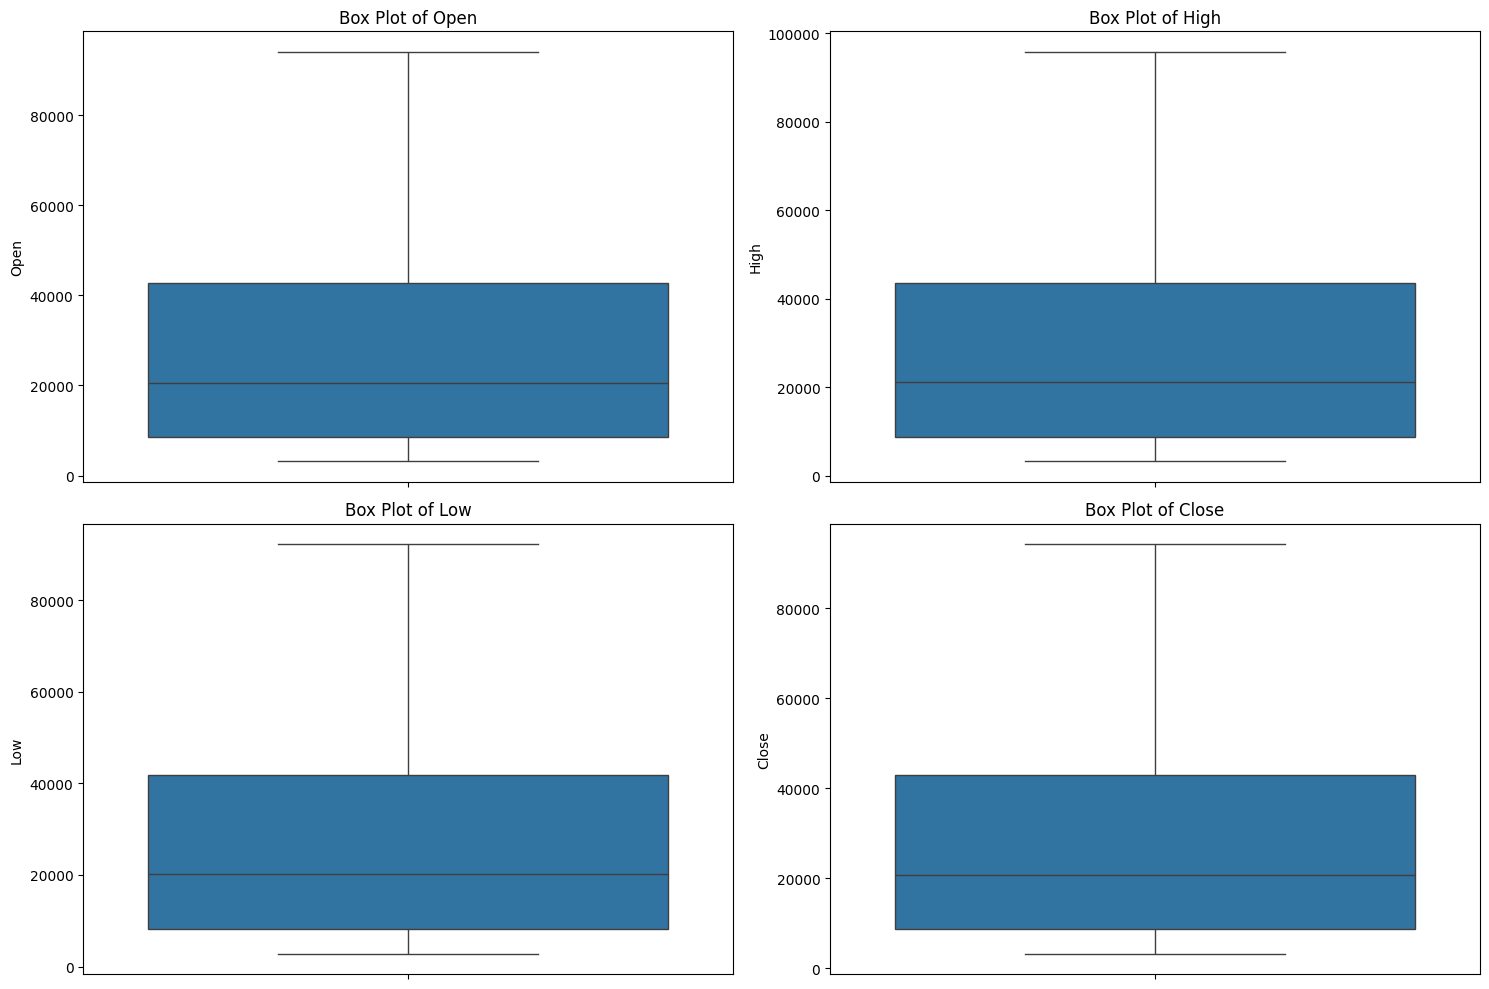

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Manually create boxplots for each column
sns.boxplot(data=df_cleaned['Open'], ax=axs[0, 0])
axs[0, 0].set_title('Box Plot of Open')

sns.boxplot(data=df_cleaned['High'], ax=axs[0, 1])
axs[0, 1].set_title('Box Plot of High')

sns.boxplot(data=df_cleaned['Low'], ax=axs[1, 0])
axs[1, 0].set_title('Box Plot of Low')

sns.boxplot(data=df_cleaned['Close'], ax=axs[1, 1])
axs[1, 1].set_title('Box Plot of Close')

# Adjust layout to prevent overlap of titles and labels
plt.tight_layout()
plt.show()